In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import itertools

DATA_PATH = 'transcriptomic_preproc'
RANDOM_STATE = 42

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata = sc.read(DATA_PATH) # data already preprocess
adata

AnnData object with n_obs × n_vars = 247976 × 2789
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [3]:
adata = adata[adata.obs['cell_type'] == 'CSF']
adata = adata[adata.obs['MS/HC'] == 'HC']

In [4]:
adata.obs['cell_types_labels'].value_counts()

cell_types_labels
T cells                     28489
B cells                      6085
Monocytes                    1357
ILC                           471
Plasma cells                  461
DC                             29
HSC/MPP                        24
Megakaryocytes/platelets        1
pDC                             1
Name: count, dtype: int64

In [5]:
# drop cells 'Double-negative thymocytes', 'Epithelial cells', 'B-cell lineage', 'MNP'
adata = adata[~adata.obs['cell_types_labels'].isin(['Megakaryocytes/platelets', 'pDC'])]

### Finding markers gene

In [6]:
sc.tl.rank_genes_groups(adata, 'cell_types_labels', method='t-test', random_state=RANDOM_STATE)

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packa

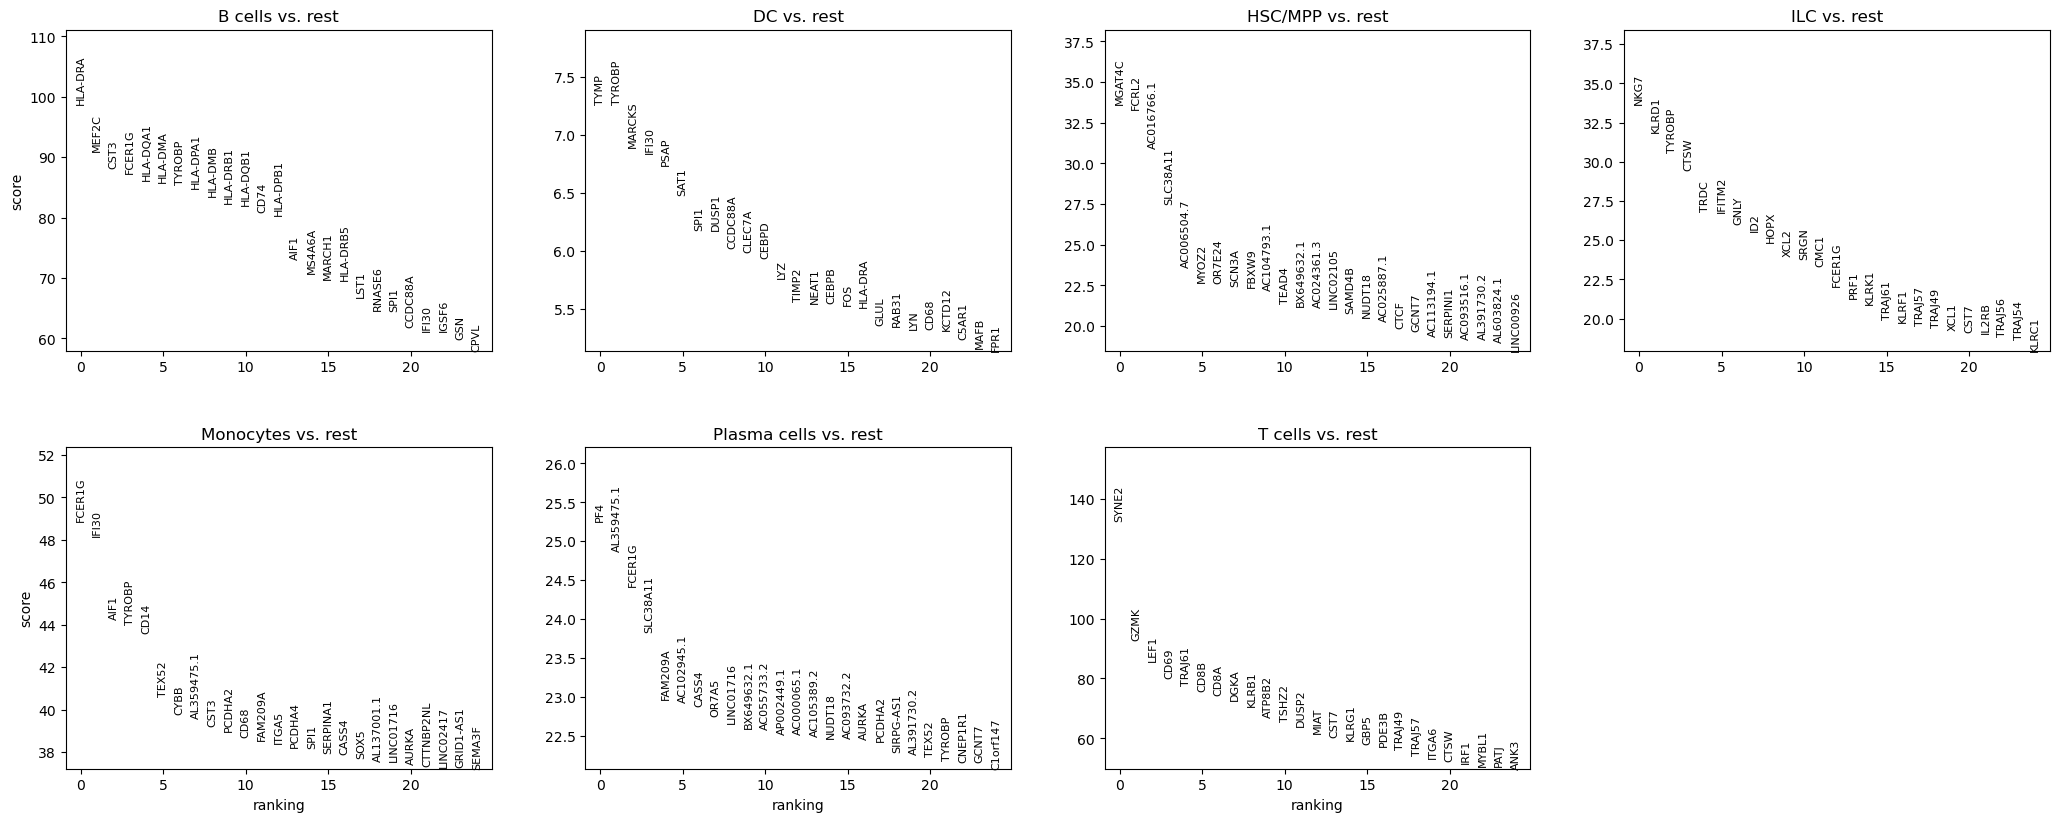

In [7]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [8]:
pd.DataFrame(adata.uns['rank_genes_groups']['names'])[:10]

B cells       DC     HSC/MPP     ILC   Monocytes Plasma cells T cells
0   HLA-DRA     TYMP      MGAT4C    NKG7      FCER1G          PF4   SYNE2
1     MEF2C   TYROBP       FCRL2   KLRD1       IFI30   AL359475.1    GZMK
2      CST3   MARCKS  AC016766.1  TYROBP        AIF1       FCER1G    LEF1
3    FCER1G    IFI30    SLC38A11    CTSW      TYROBP     SLC38A11    CD69
4  HLA-DQA1     PSAP  AC006504.7    TRDC        CD14      FAM209A  TRAJ61
5   HLA-DMA     SAT1       MYOZ2  IFITM2       TEX52   AC102945.1    CD8B
6    TYROBP     SPI1      OR7E24    GNLY        CYBB        CASS4    CD8A
7  HLA-DPA1    DUSP1       SCN3A     ID2  AL359475.1        OR7A5    DGKA
8   HLA-DMB  CCDC88A       FBXW9    HOPX        CST3    LINC01716   KLRB1
9  HLA-DRB1   CLEC7A  AC104793.1    XCL2      PCDHA2   BX649632.1  ATP8B2

In [9]:
# dict with cluster number as key and the genes as values
cluster_genes = {}
for cluster in pd.DataFrame(adata.uns['rank_genes_groups']['names']).columns:
    cluster_genes[cluster] = pd.DataFrame(adata.uns['rank_genes_groups']['names'])[cluster].tolist()[:20]

In [10]:
with open('results/markers_CSF_HC.json', 'w') as f:
    json.dump(cluster_genes, f)

### Plots

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


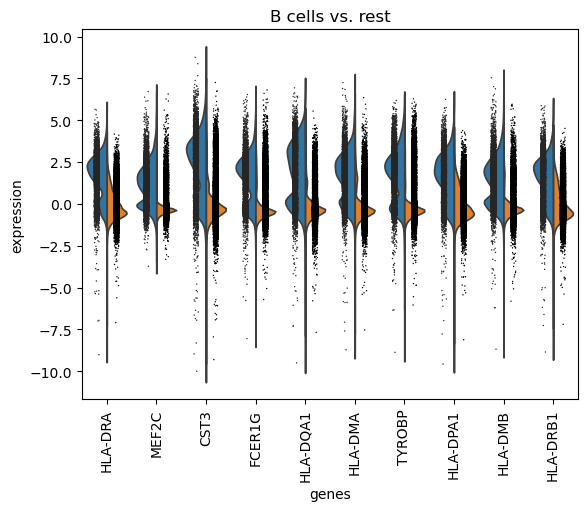

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


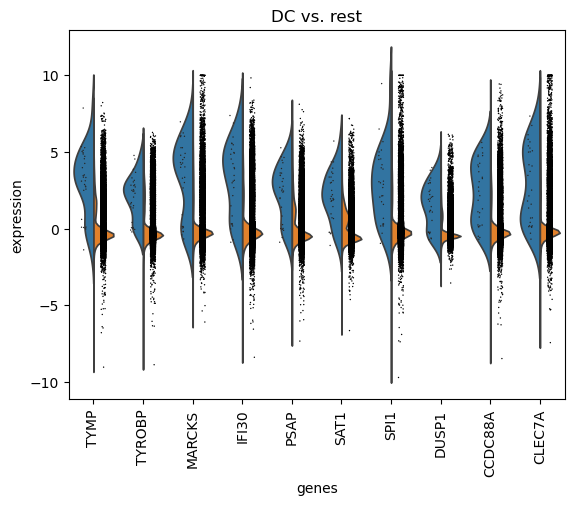

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


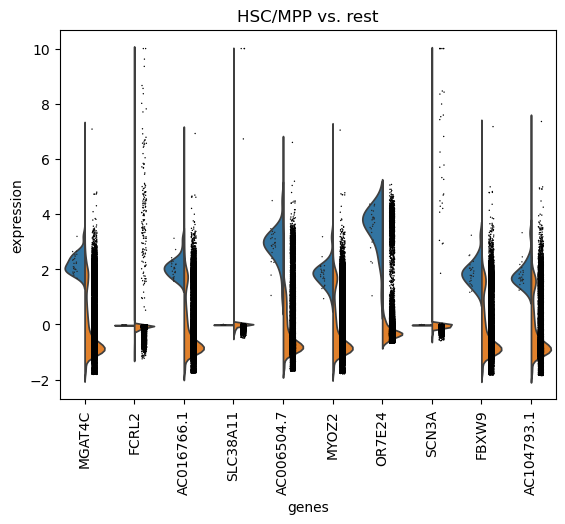

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


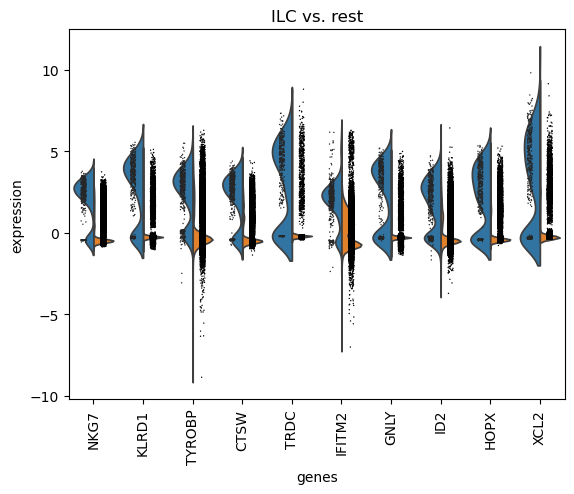

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


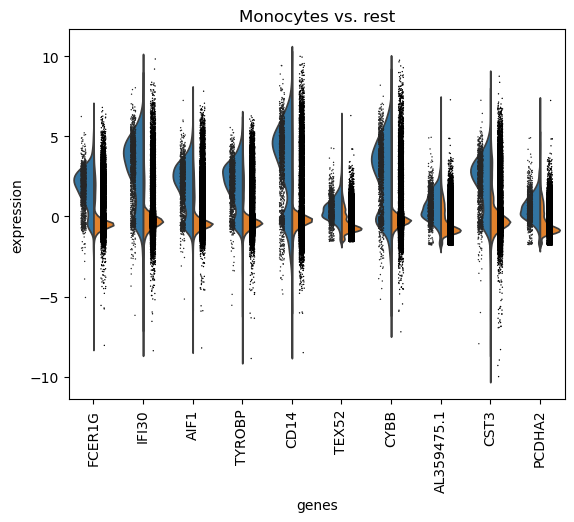

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


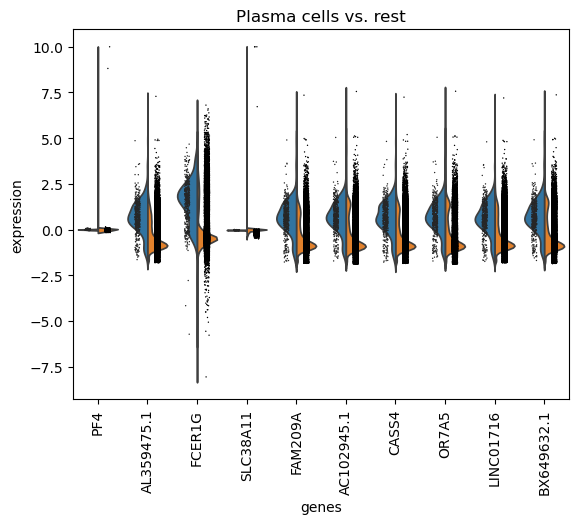

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


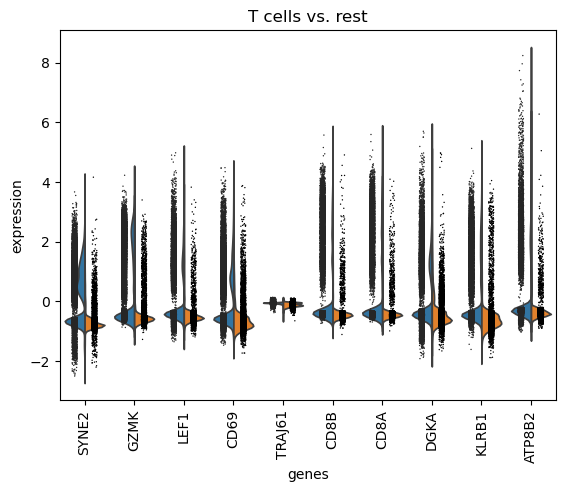

In [11]:
# visualize the clusters genes
sc.pl.rank_genes_groups_violin(adata, n_genes=10)

In [12]:
most_freq_cell_types = ['T cells', 'B cells', 'ILC', 'Monocytes', 'Plasma cells']

In [13]:
marker_genes = list(itertools.chain.from_iterable([cluster_genes[cell] for cell in most_freq_cell_types]))

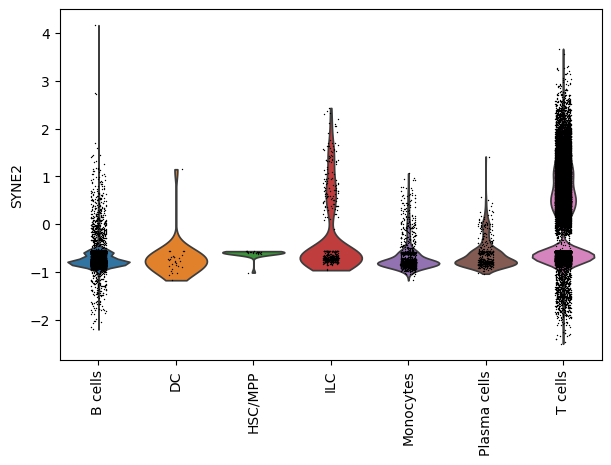

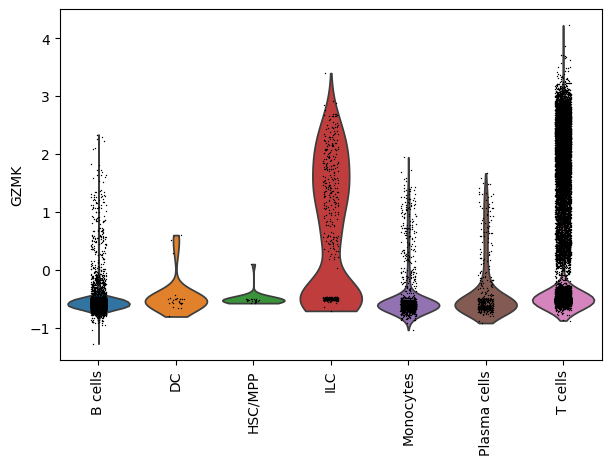

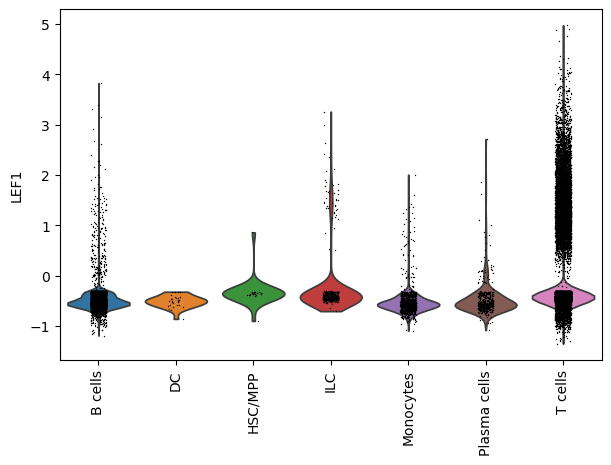

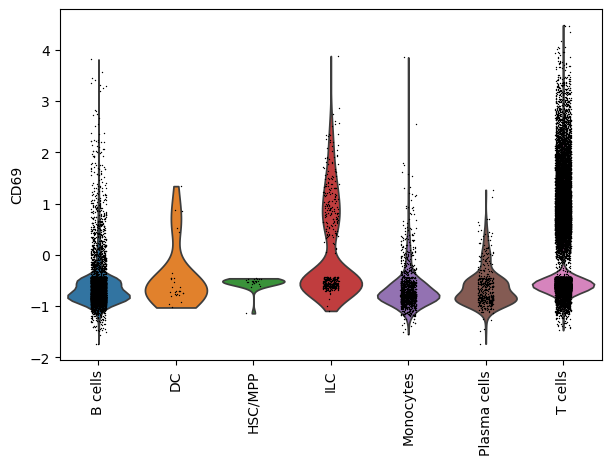

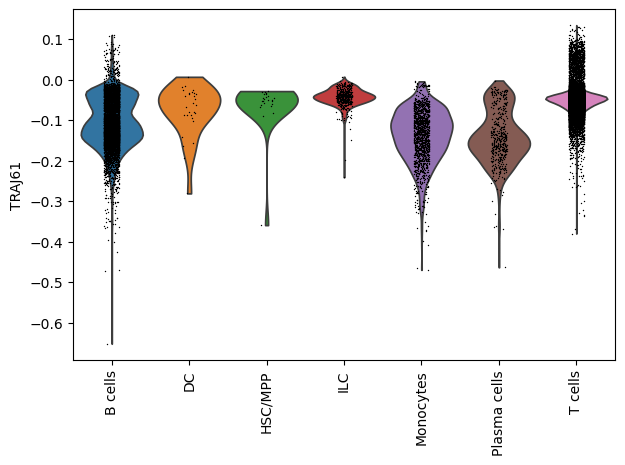

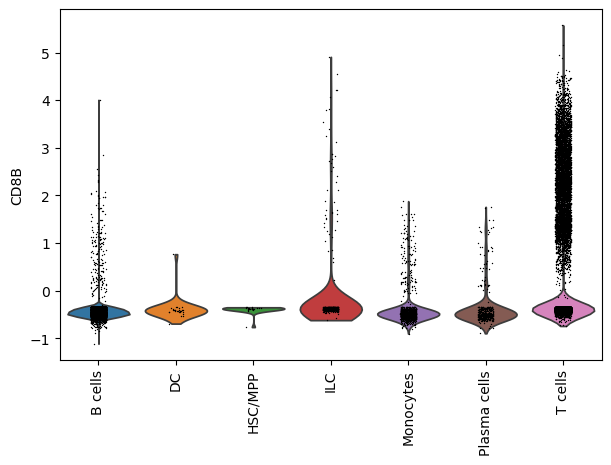

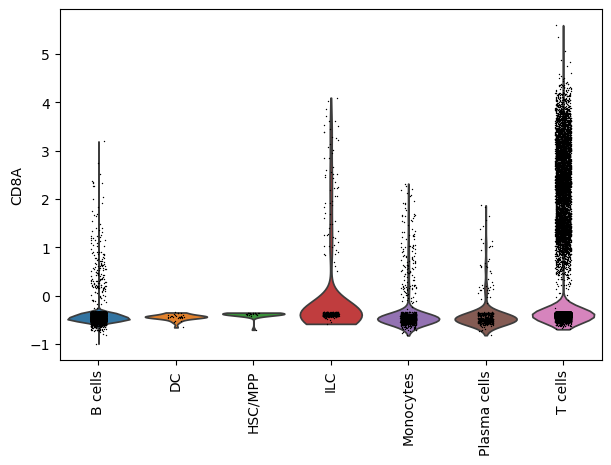

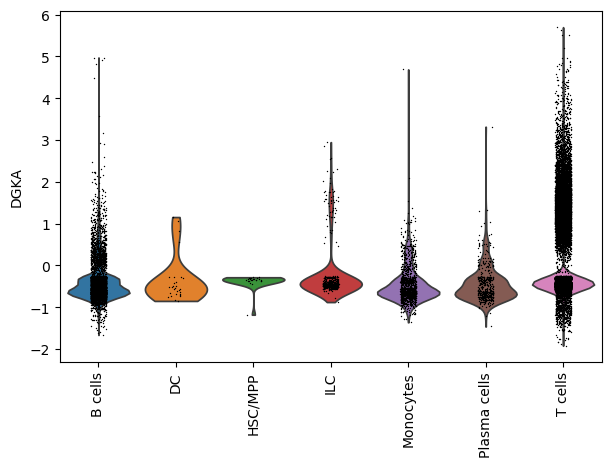

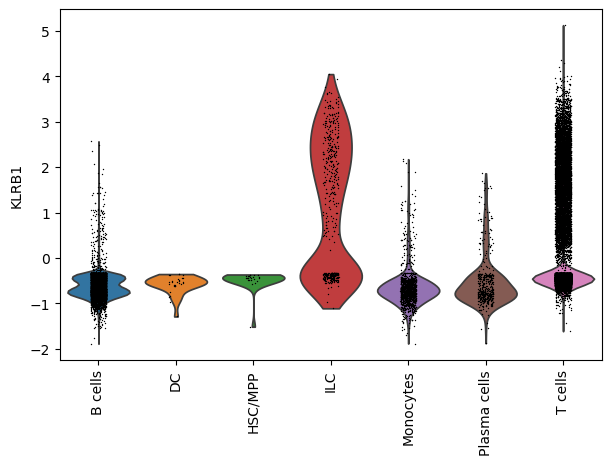

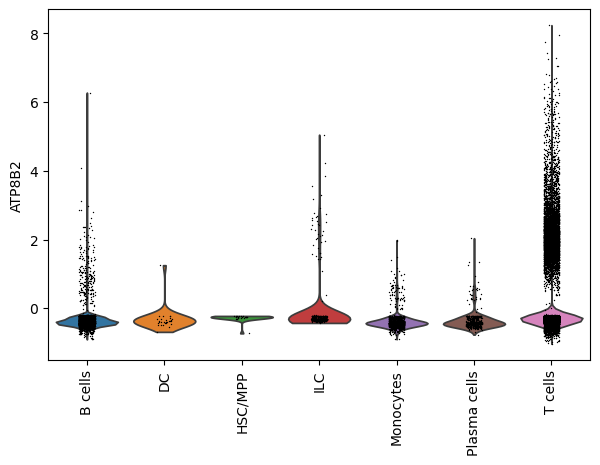

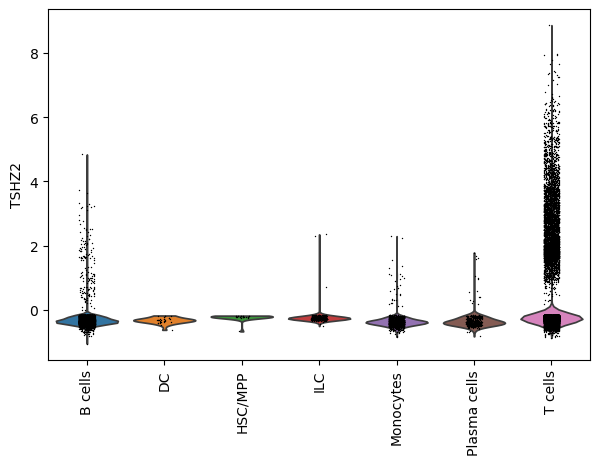

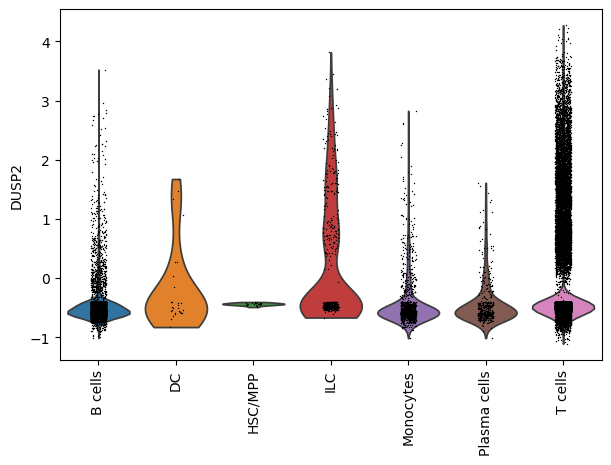

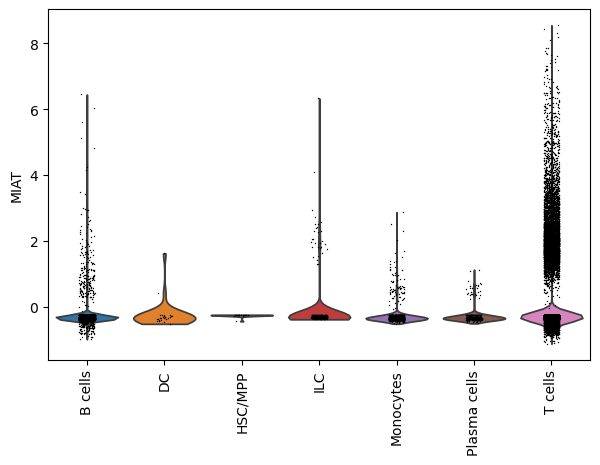

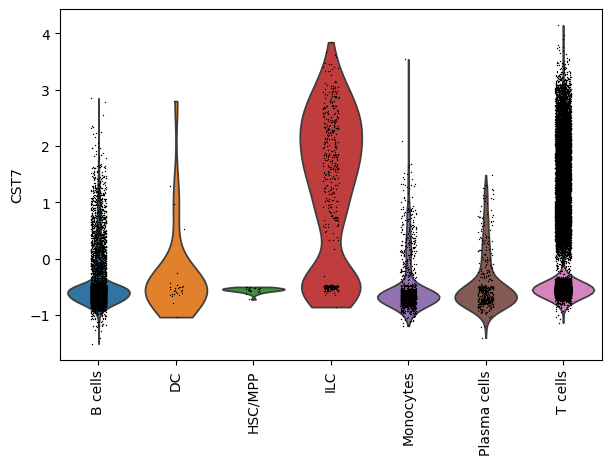

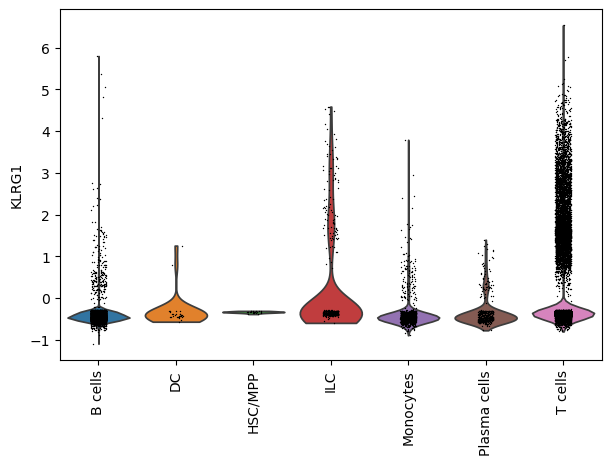

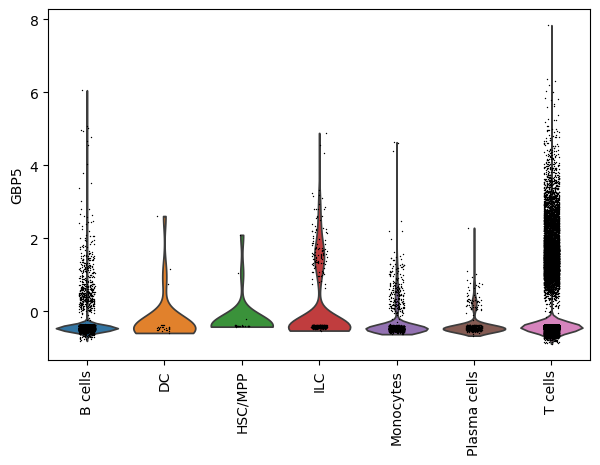

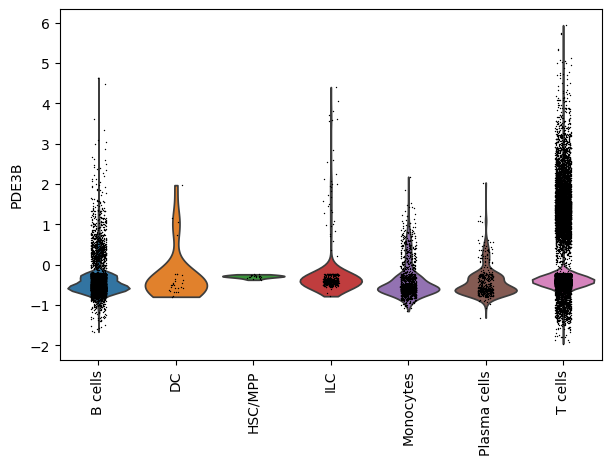

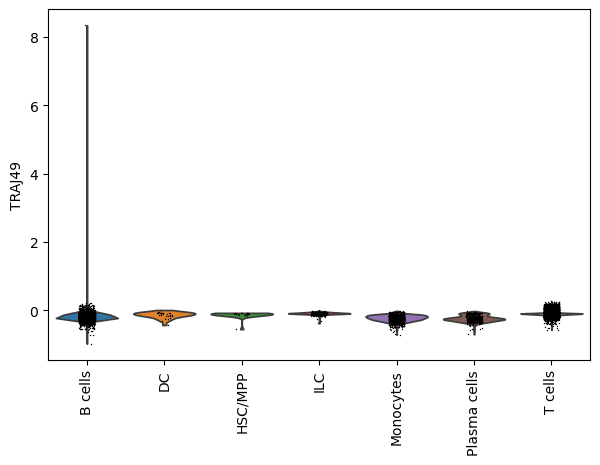

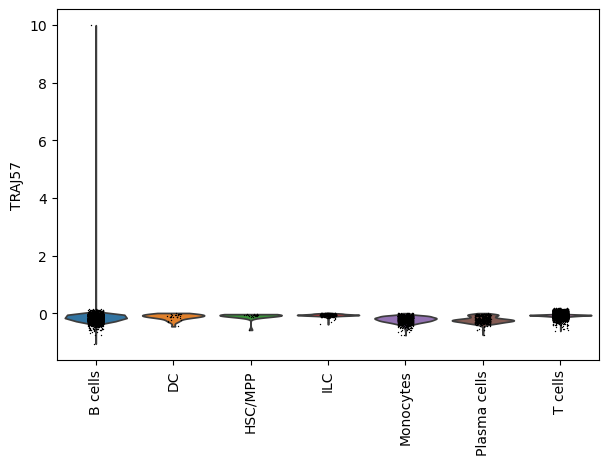

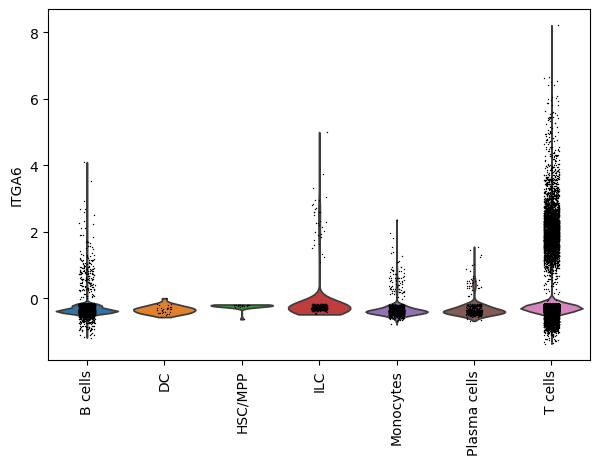

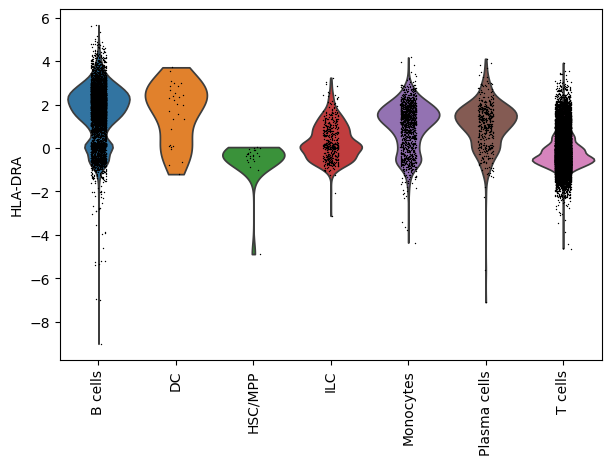

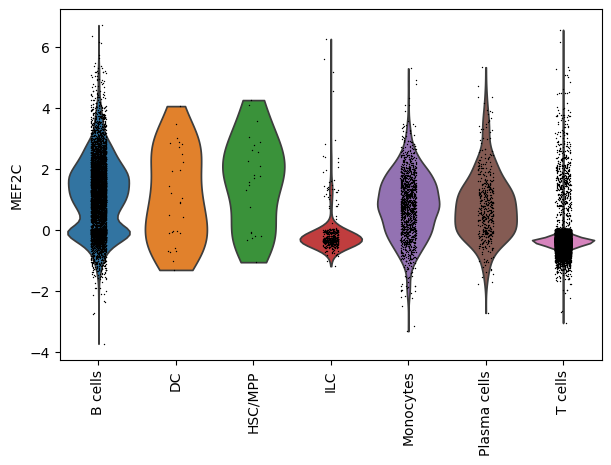

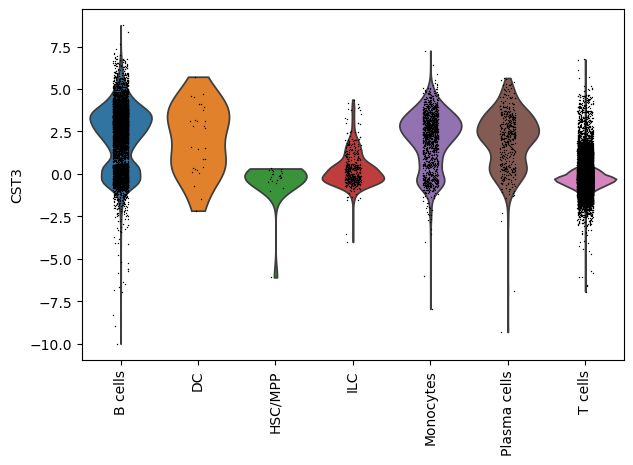

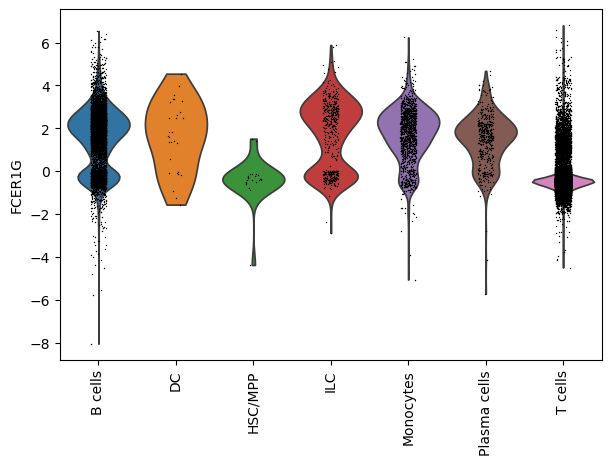

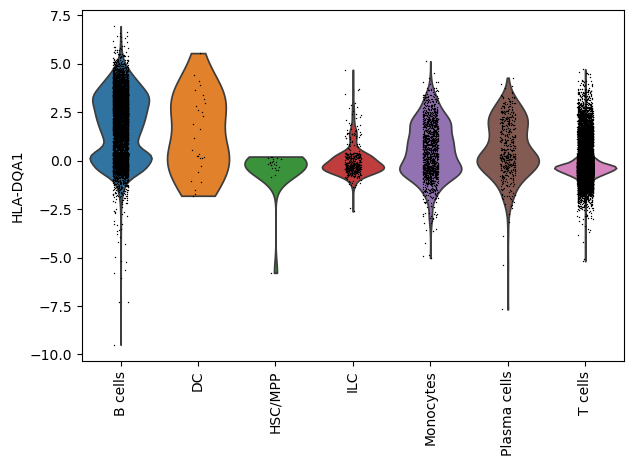

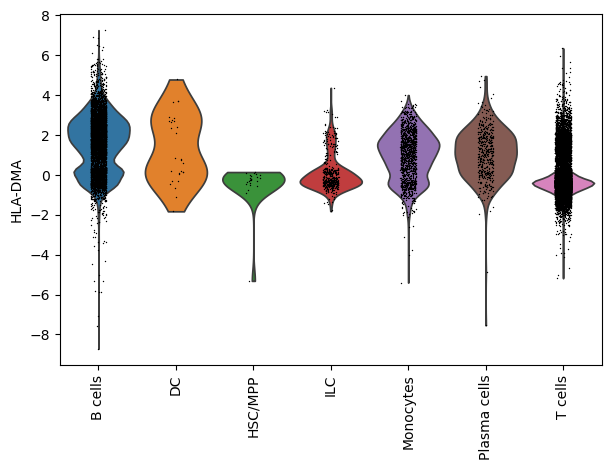

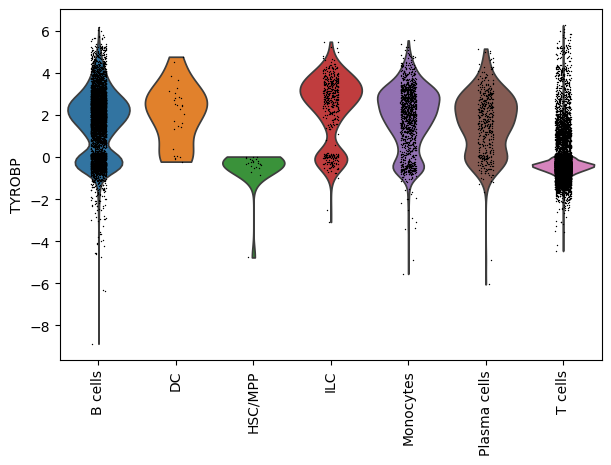

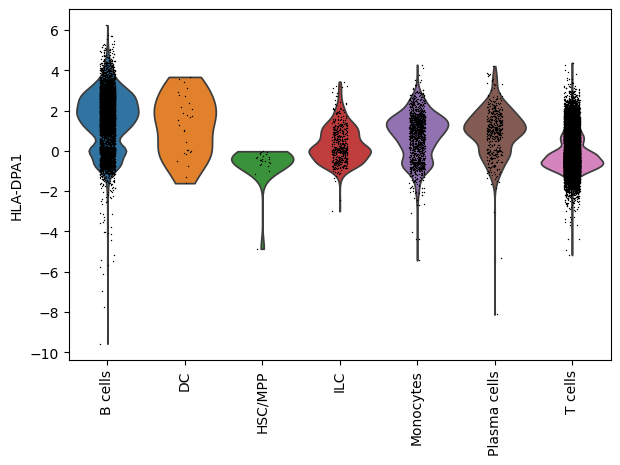

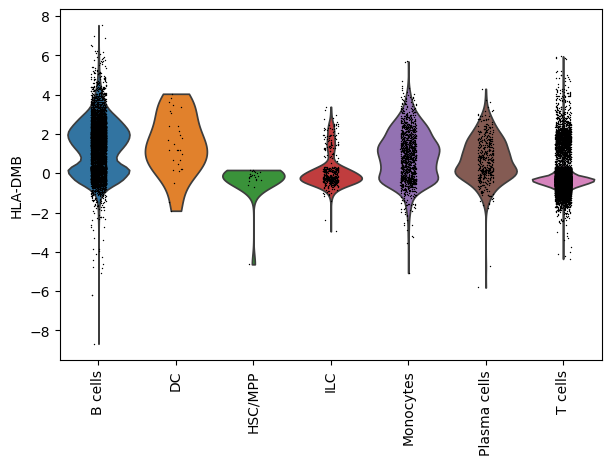

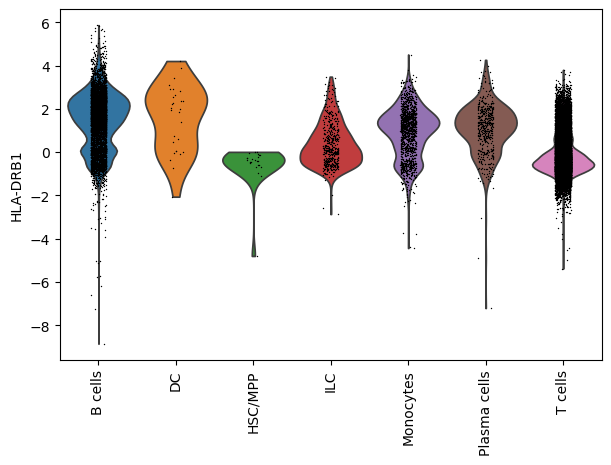

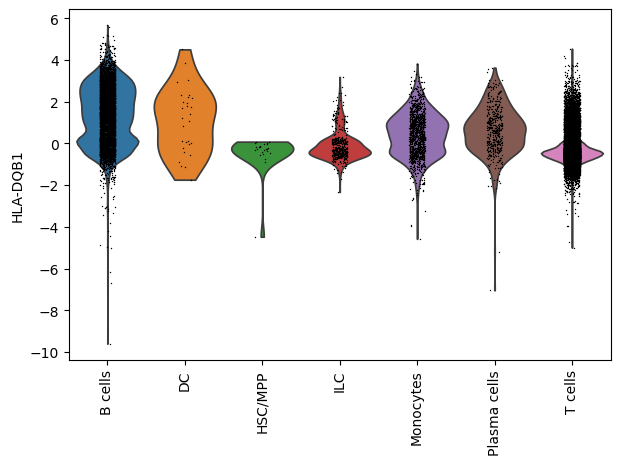

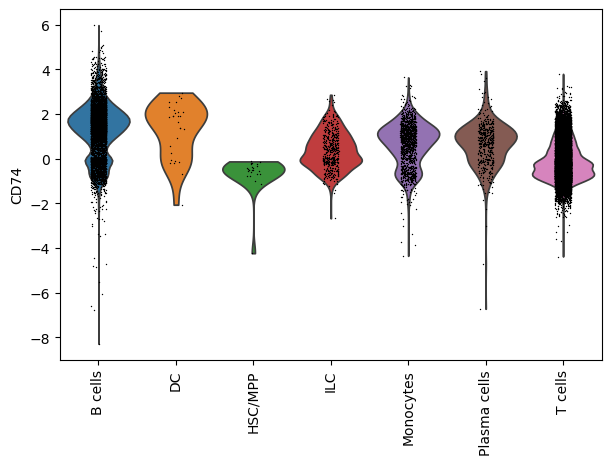

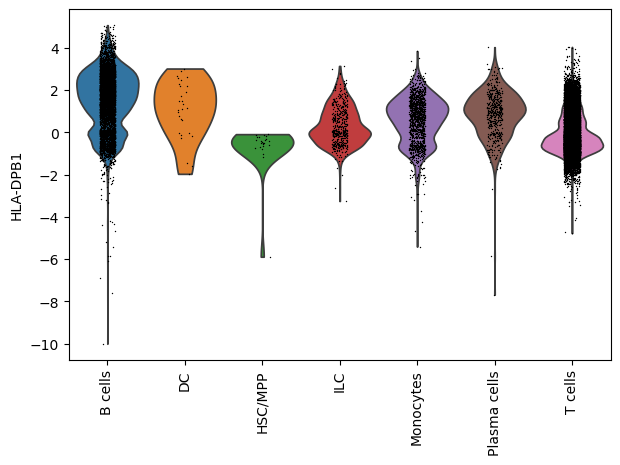

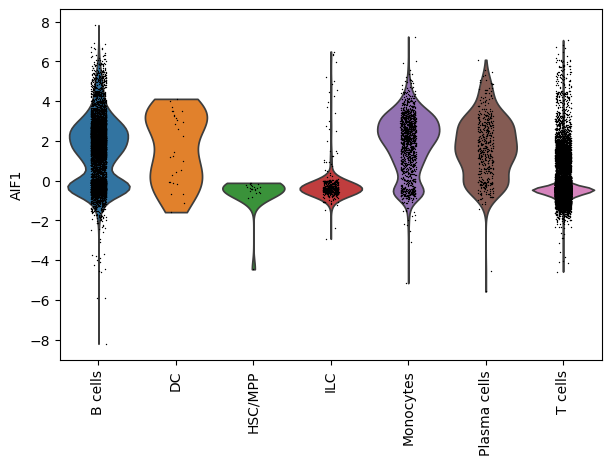

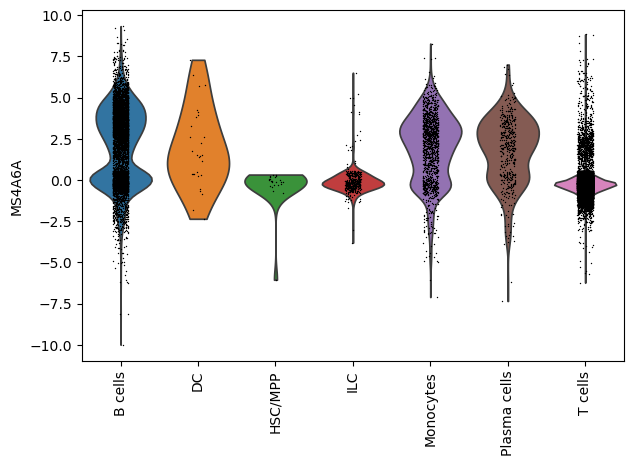

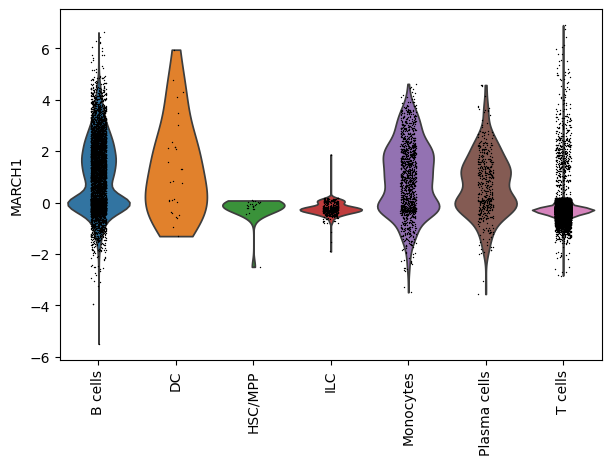

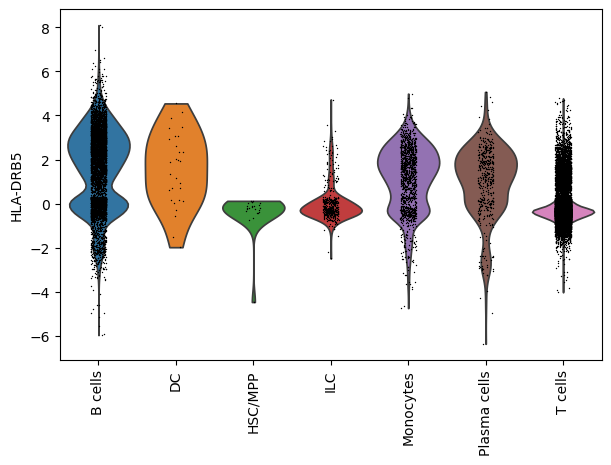

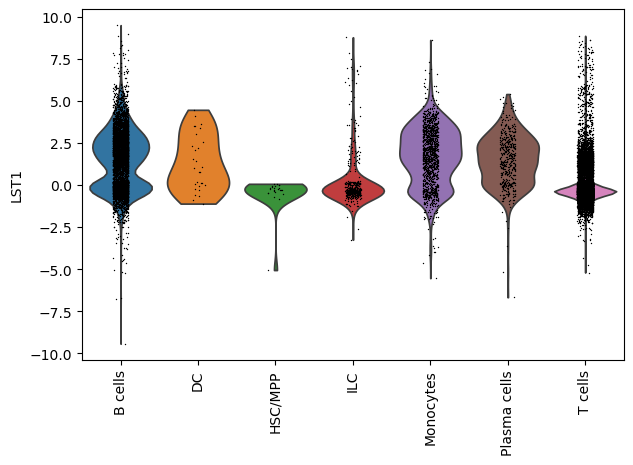

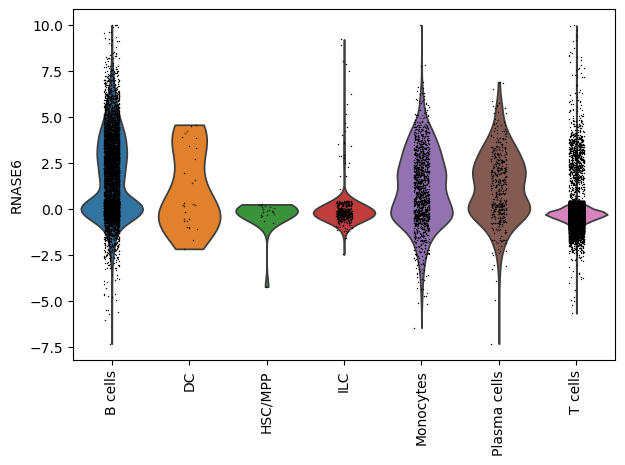

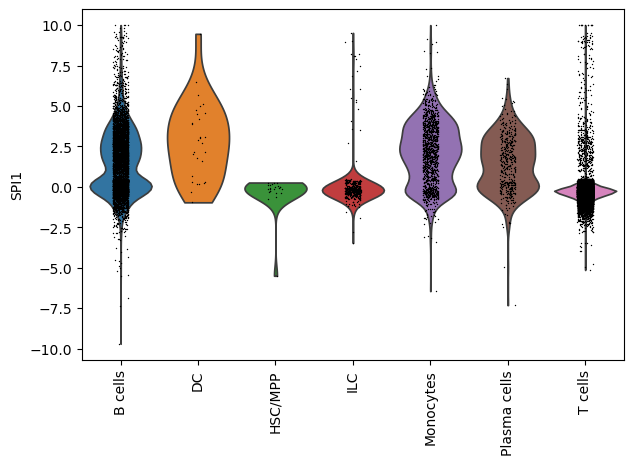

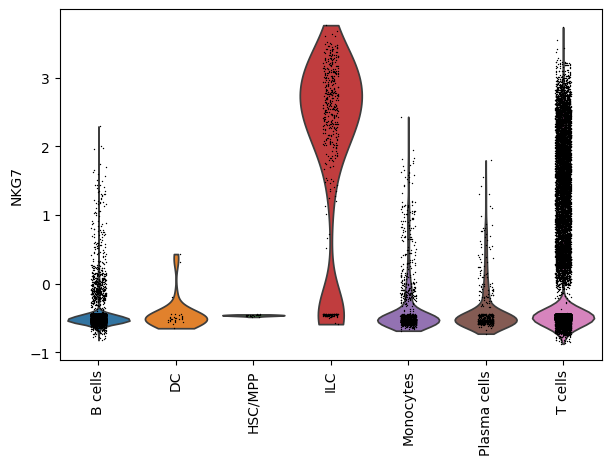

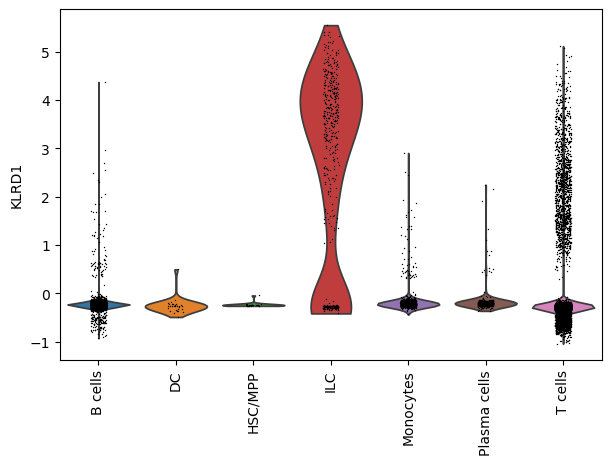

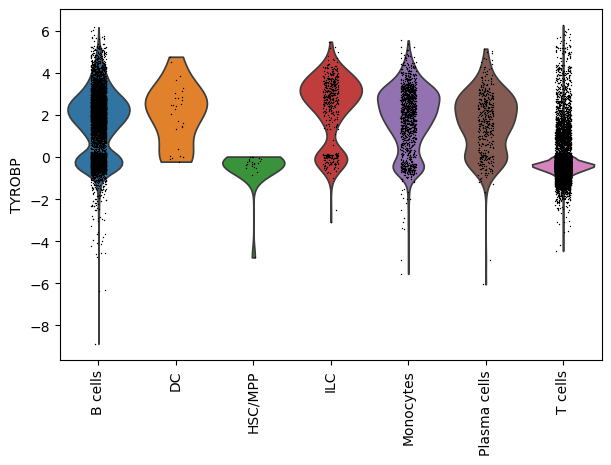

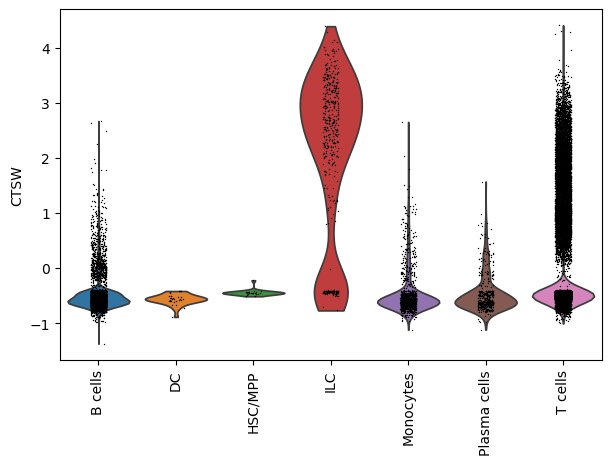

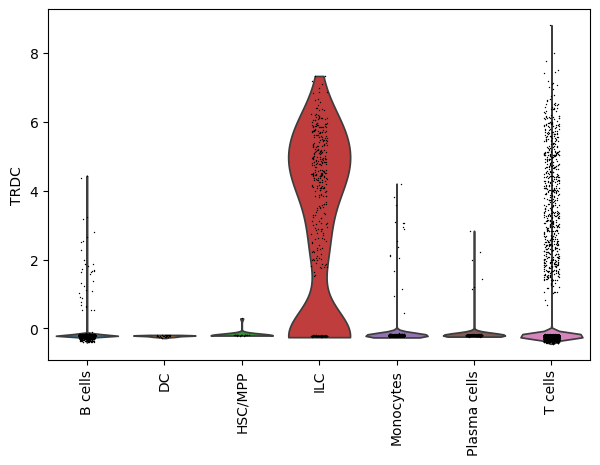

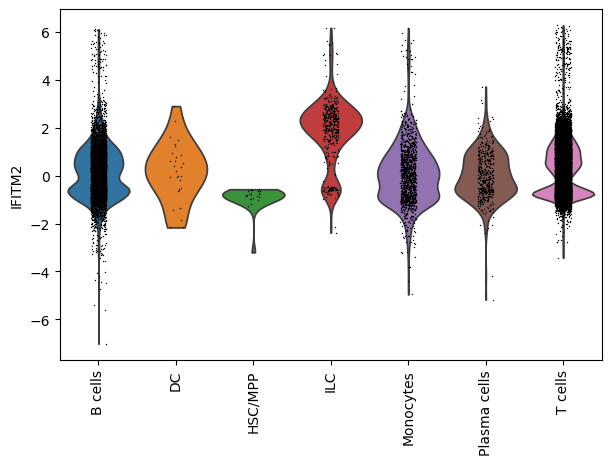

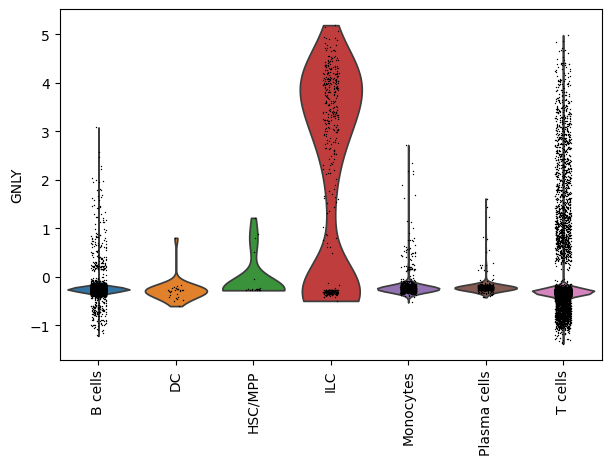

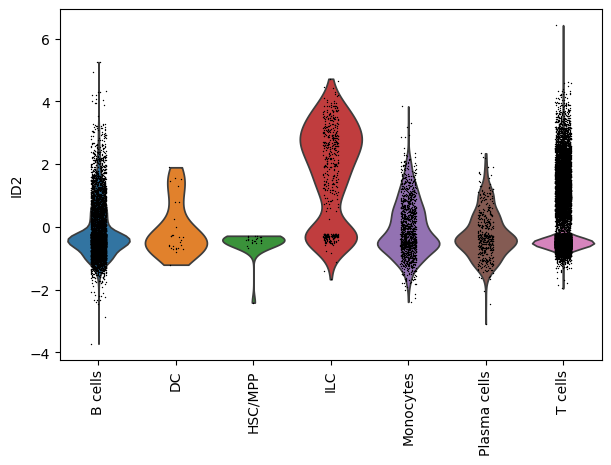

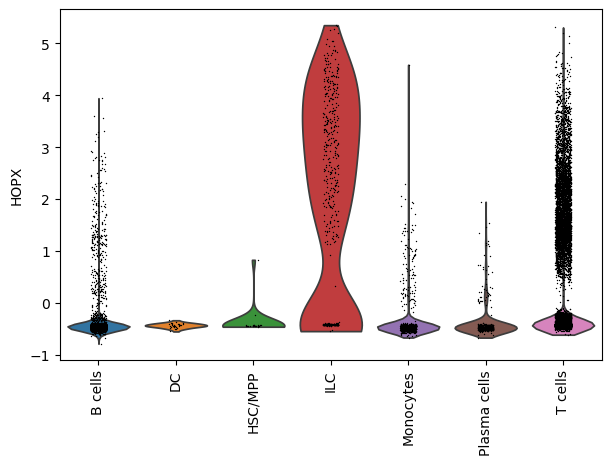

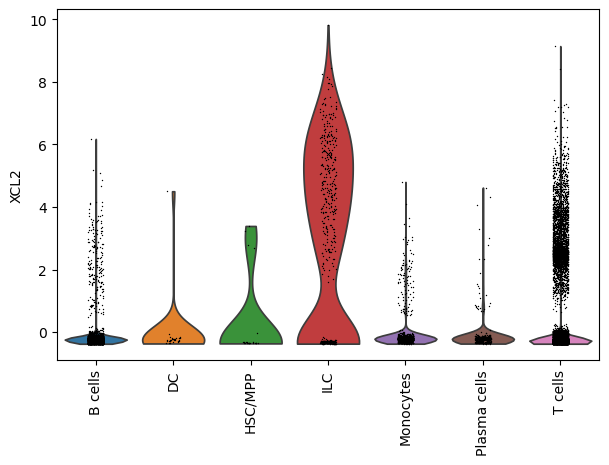

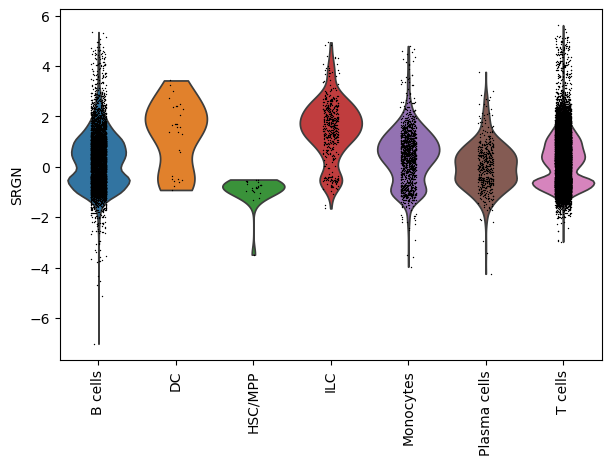

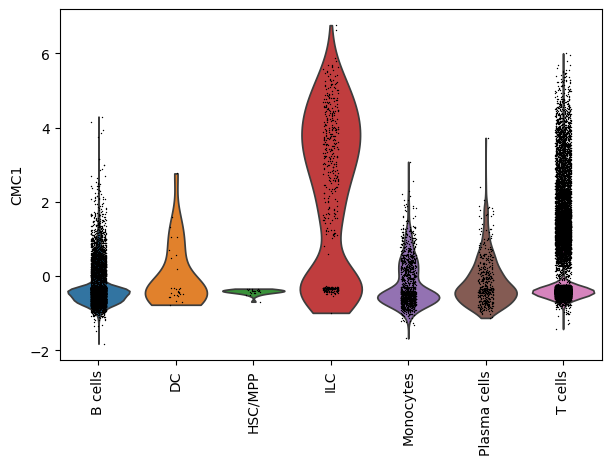

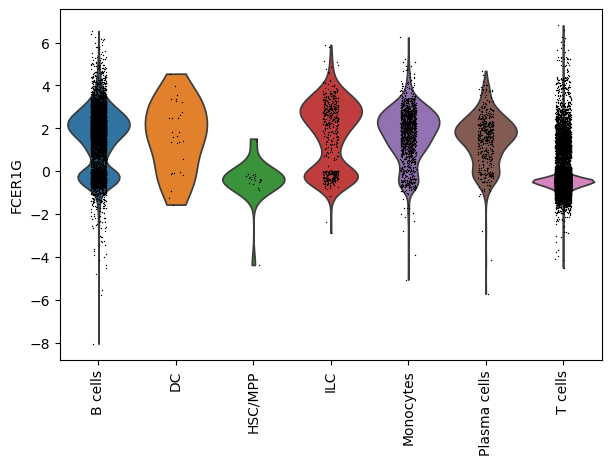

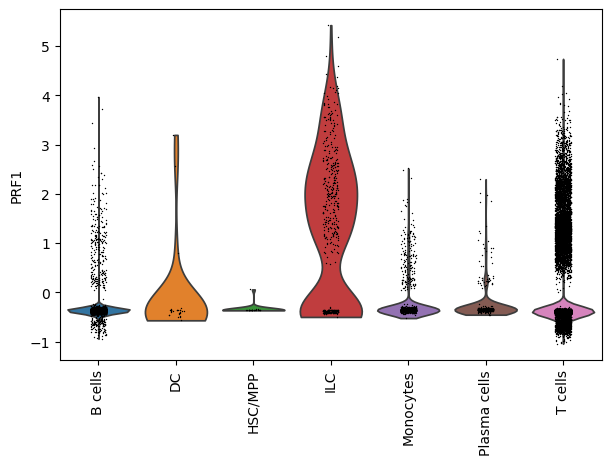

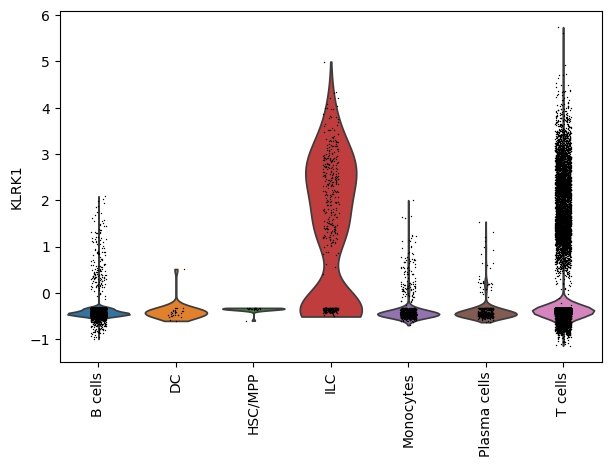

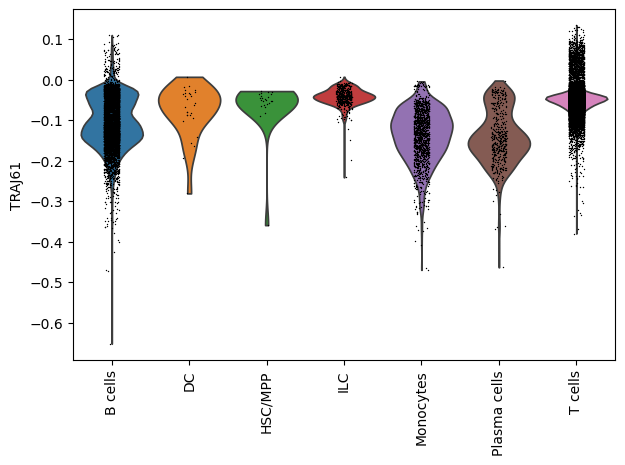

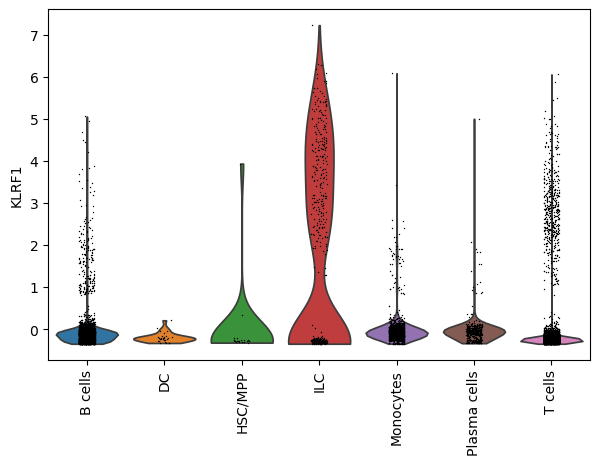

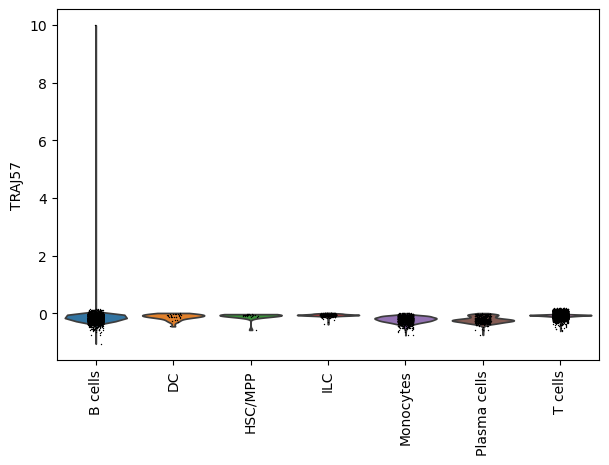

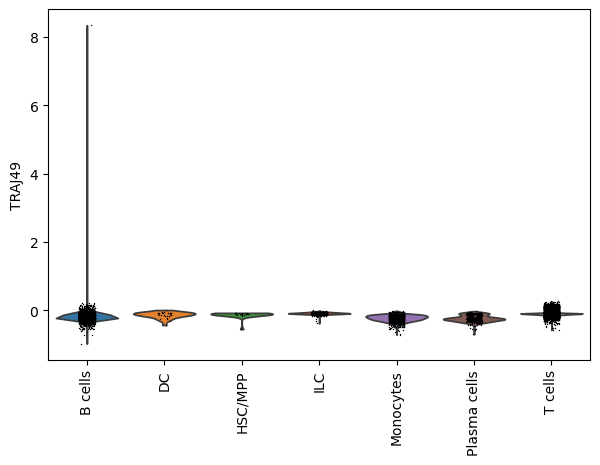

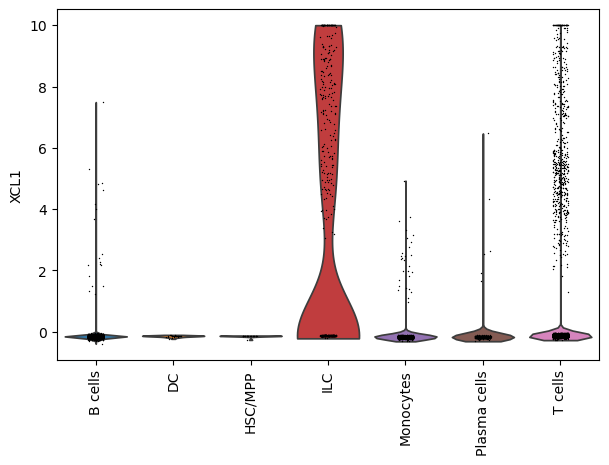

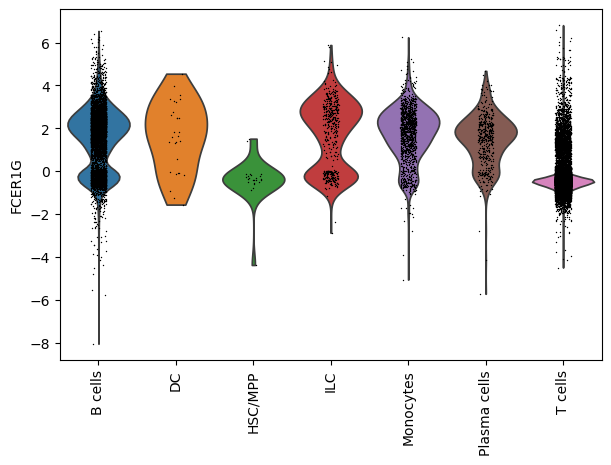

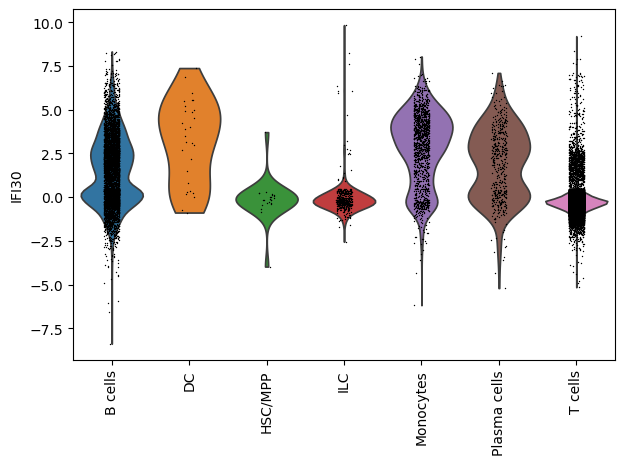

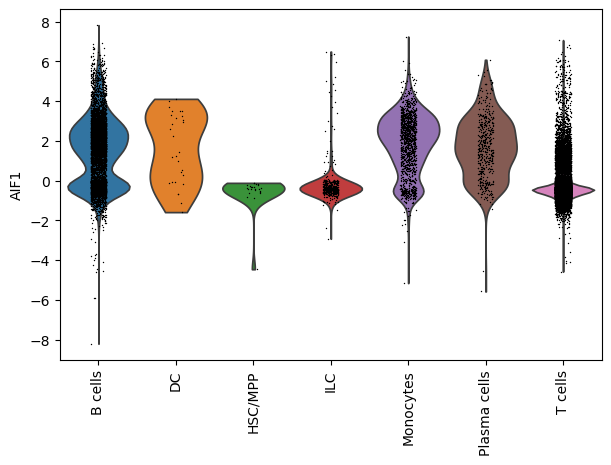

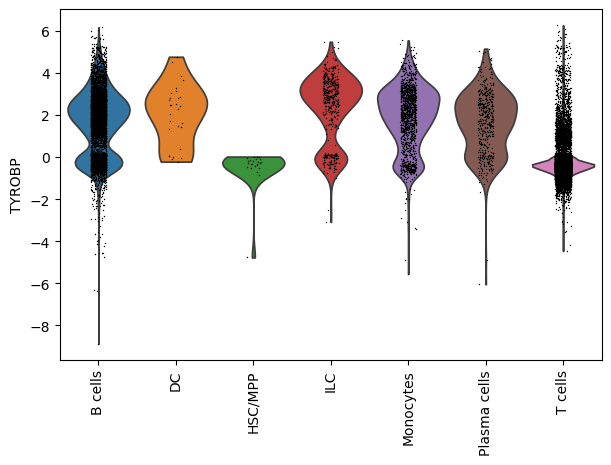

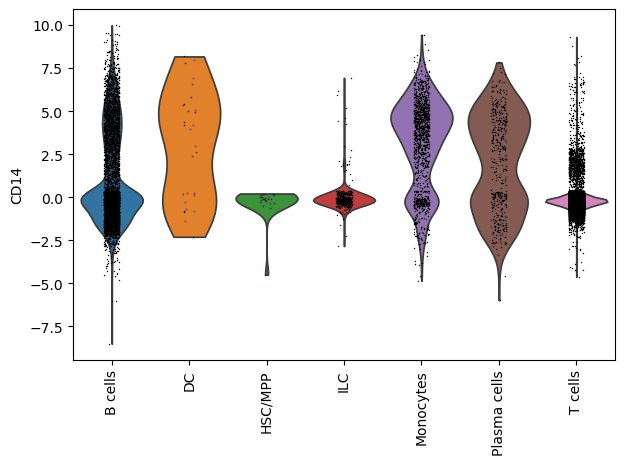

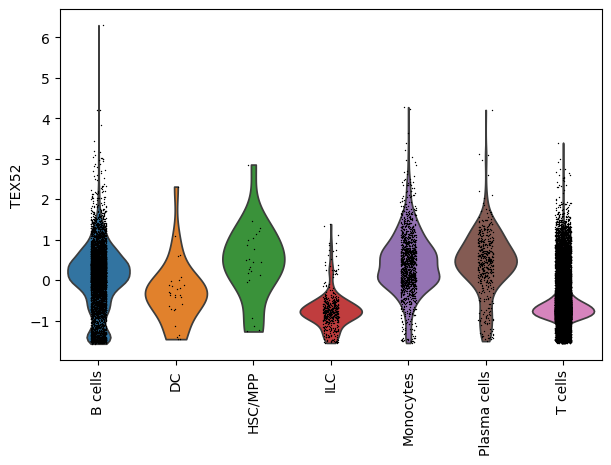

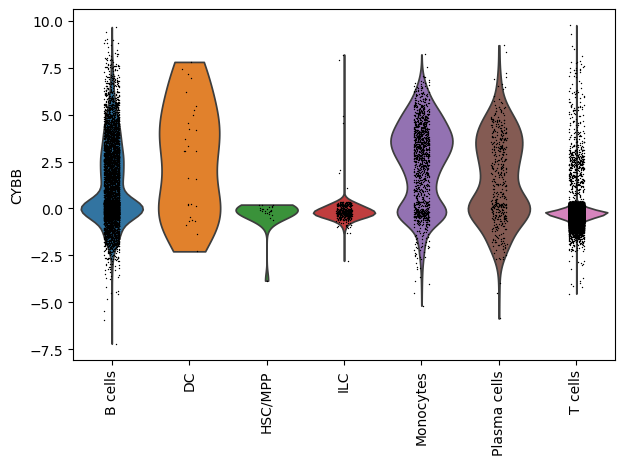

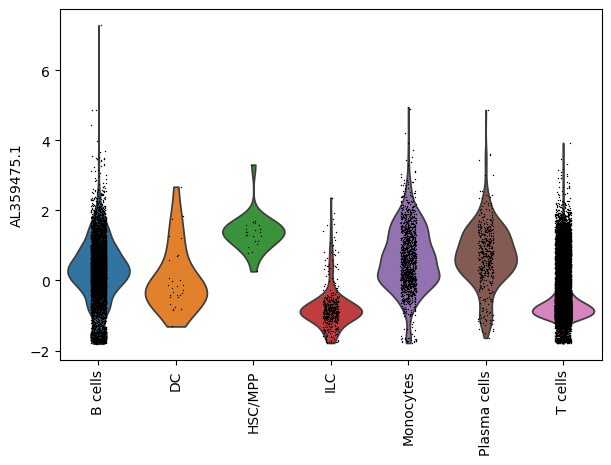

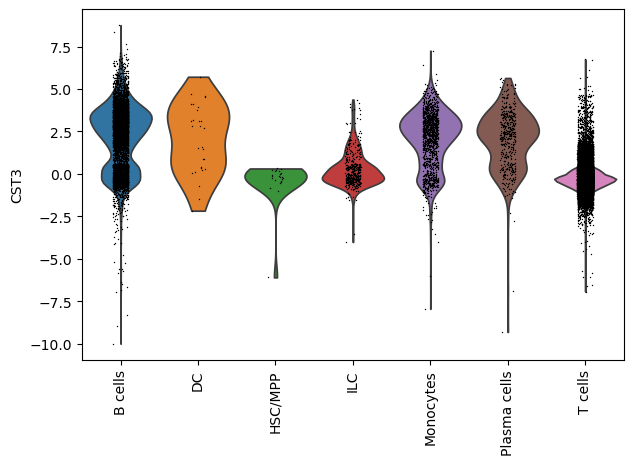

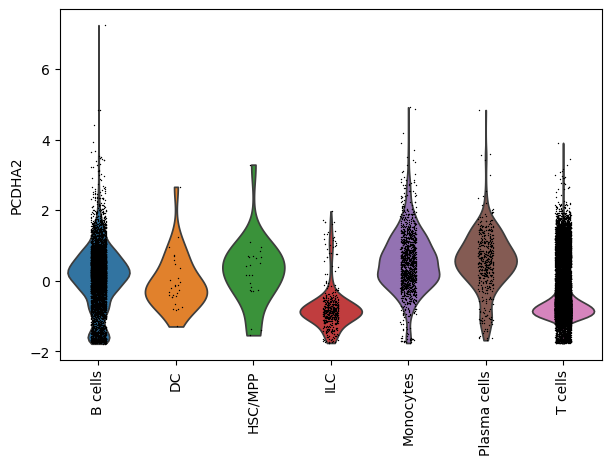

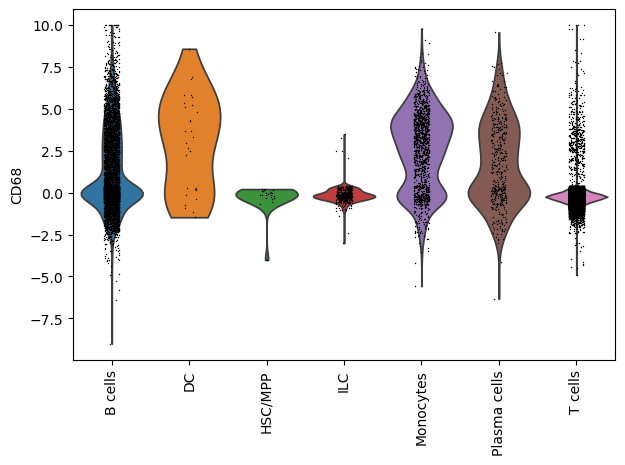

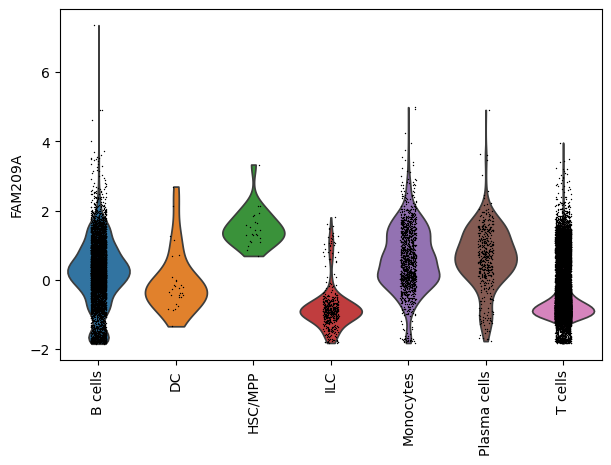

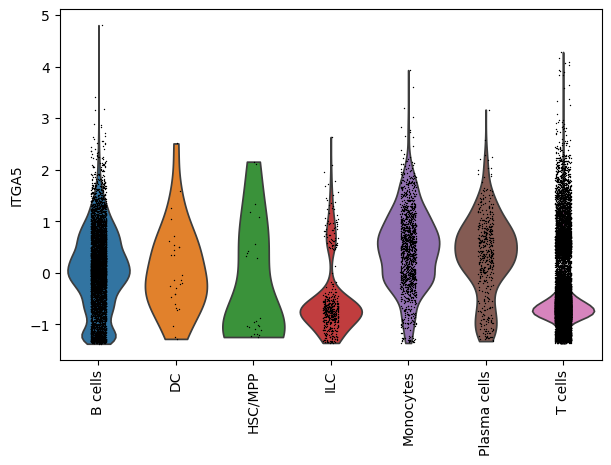

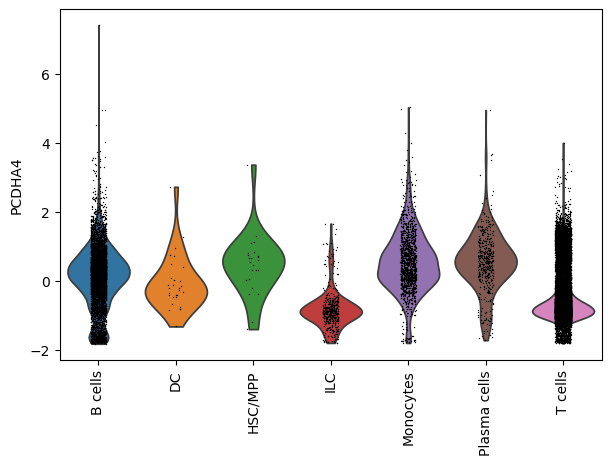

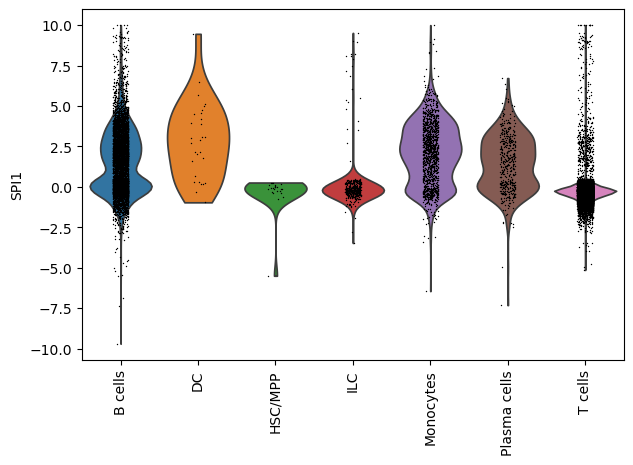

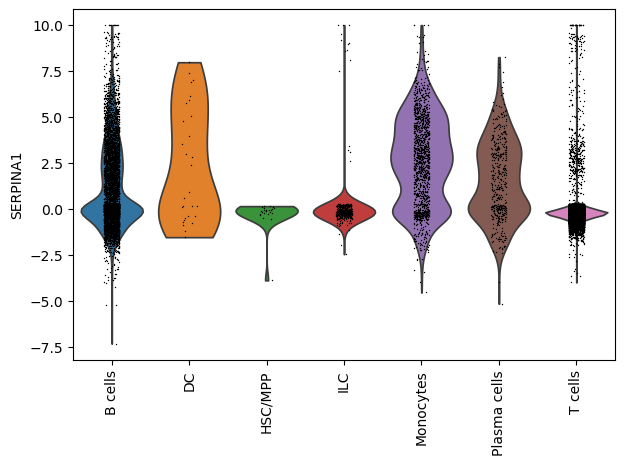

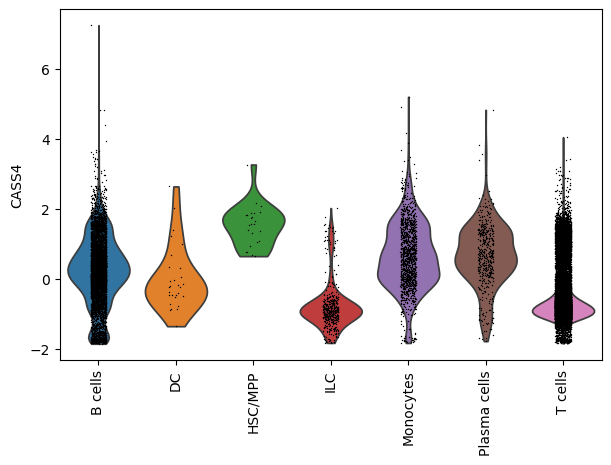

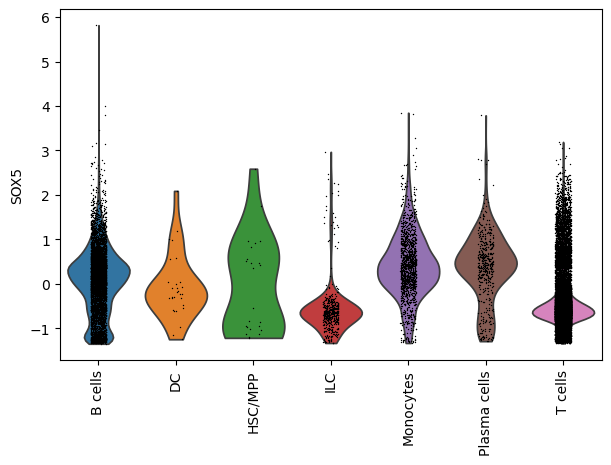

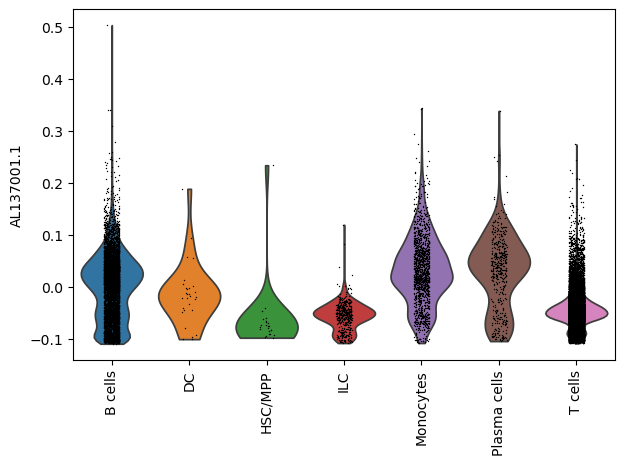

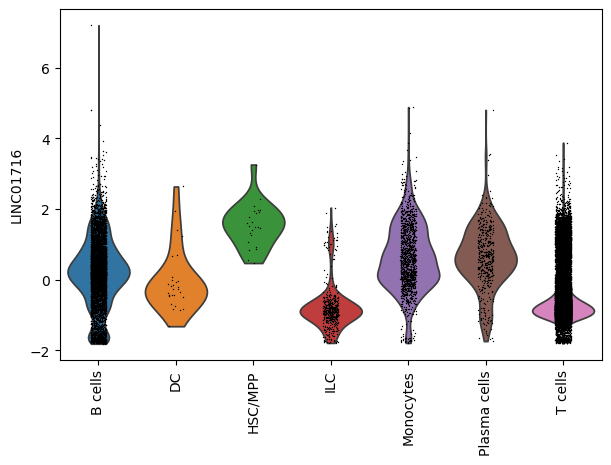

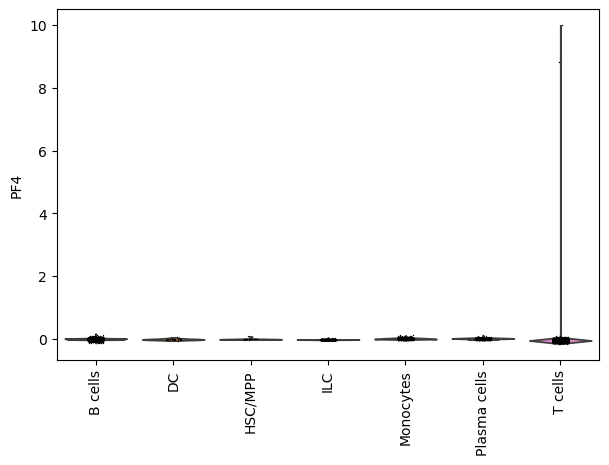

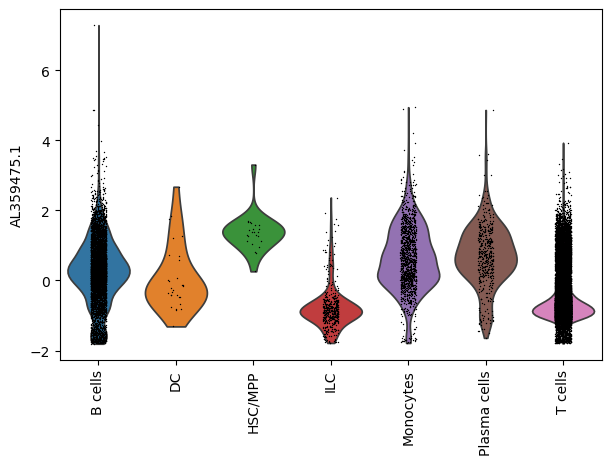

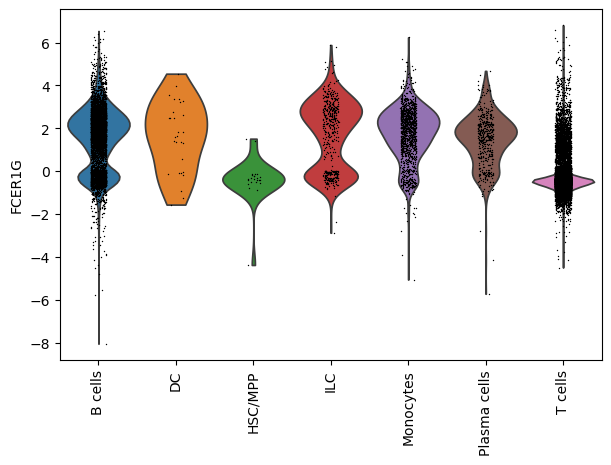

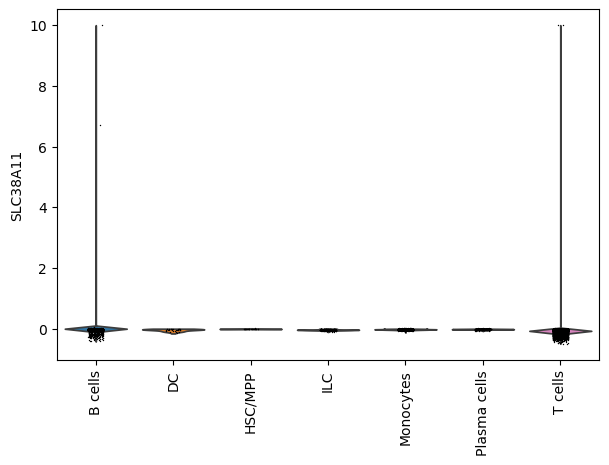

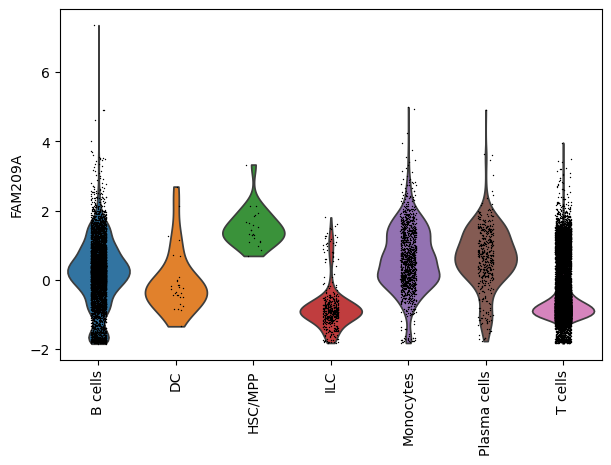

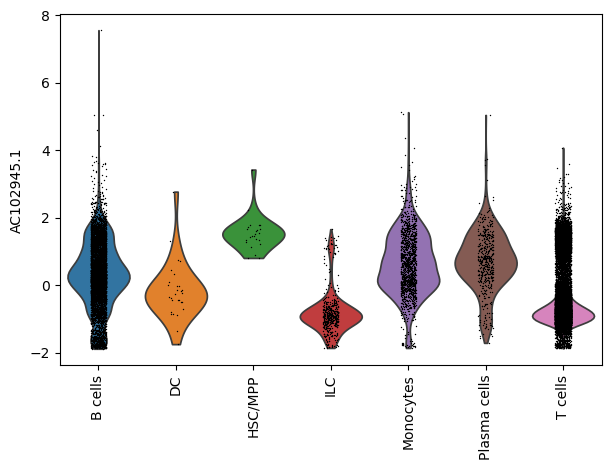

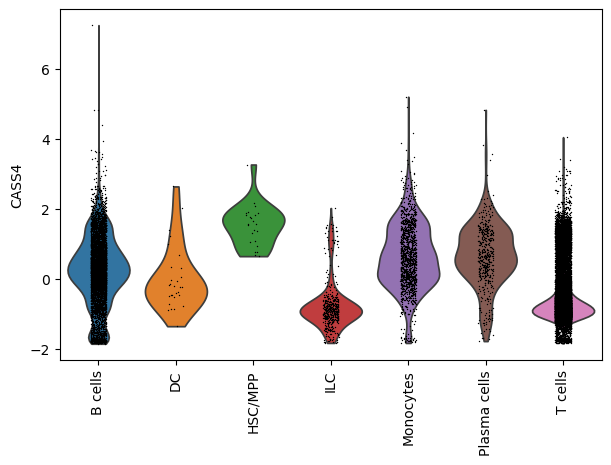

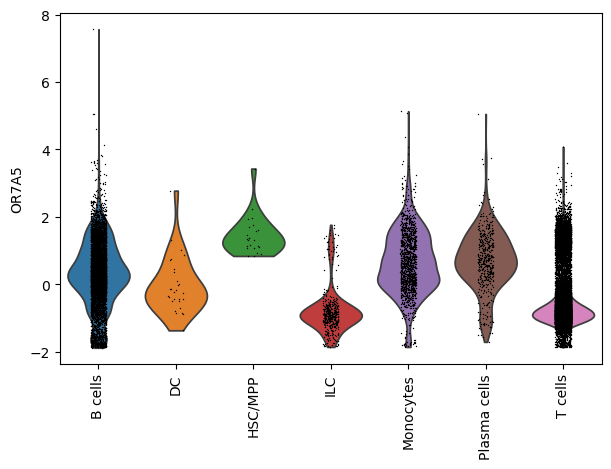

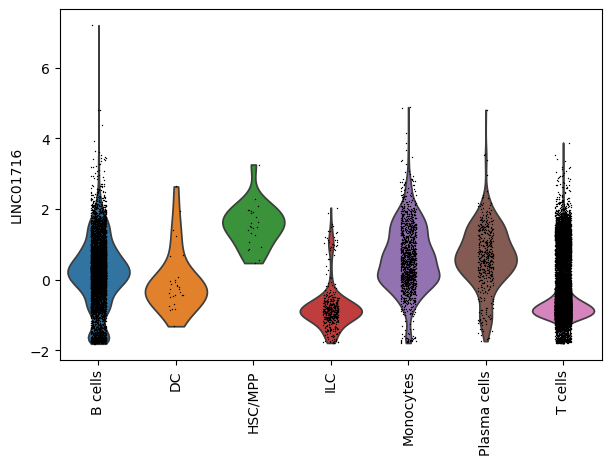

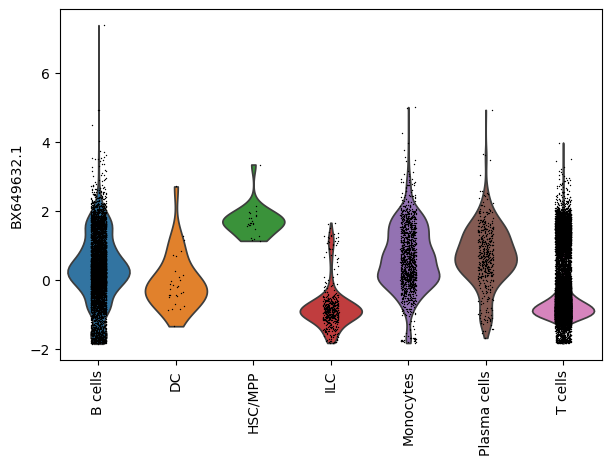

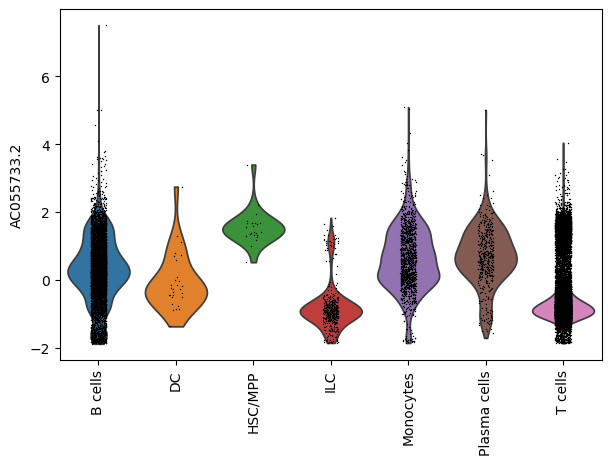

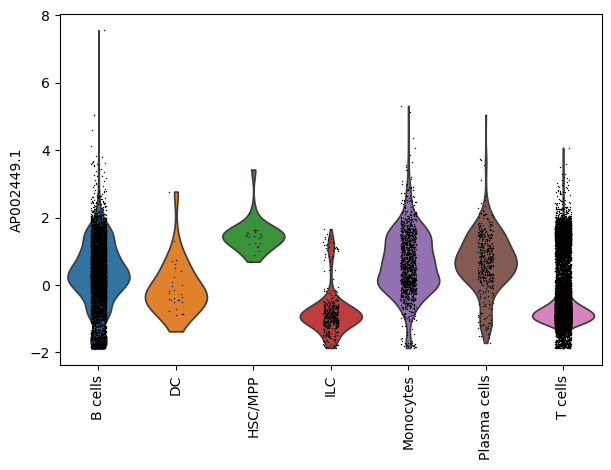

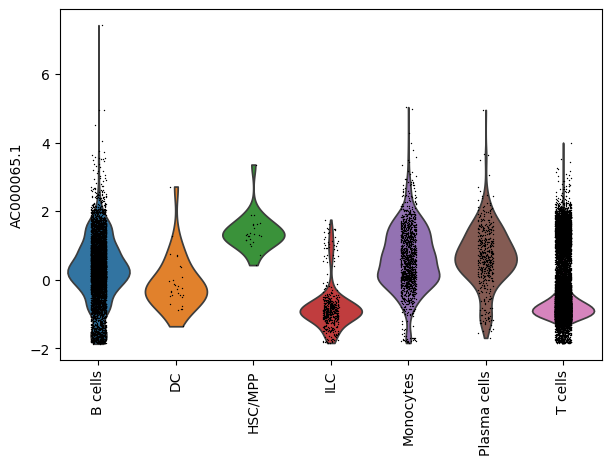

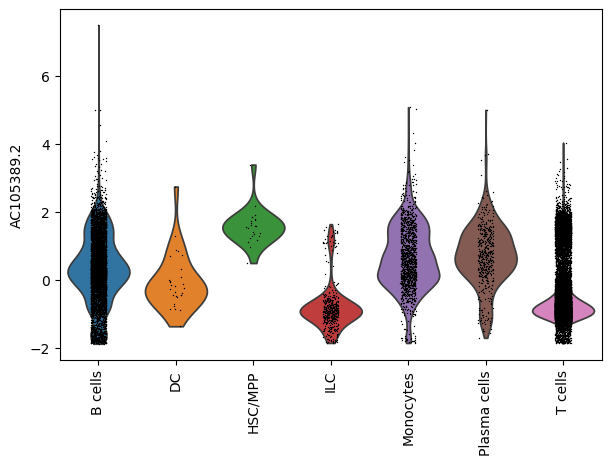

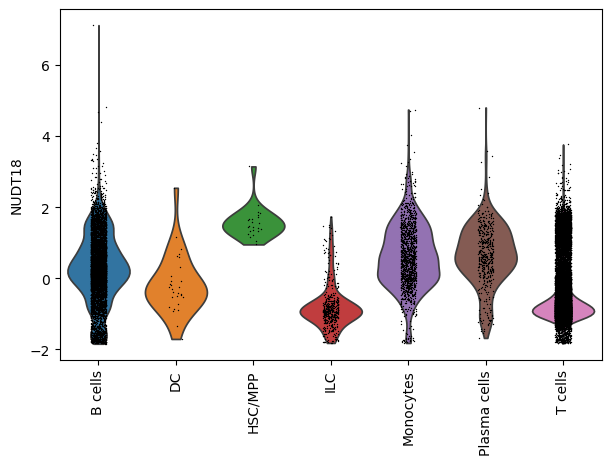

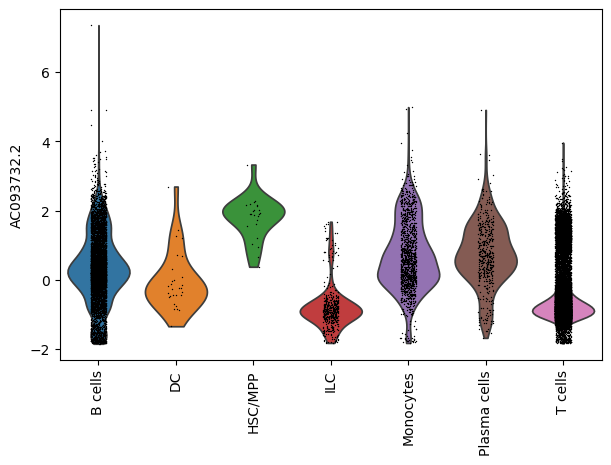

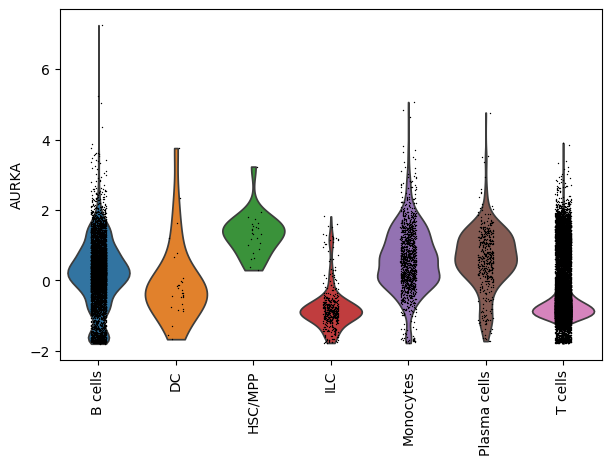

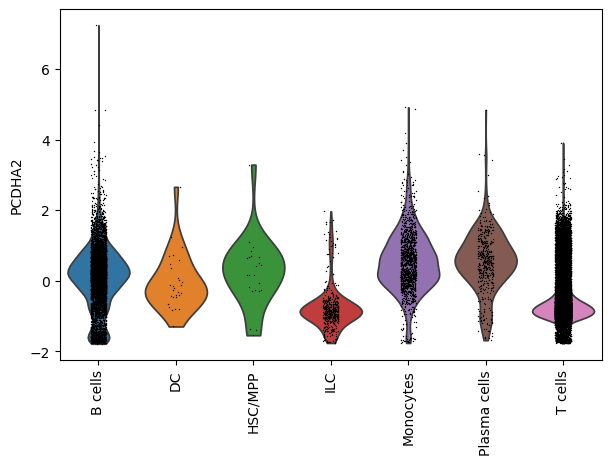

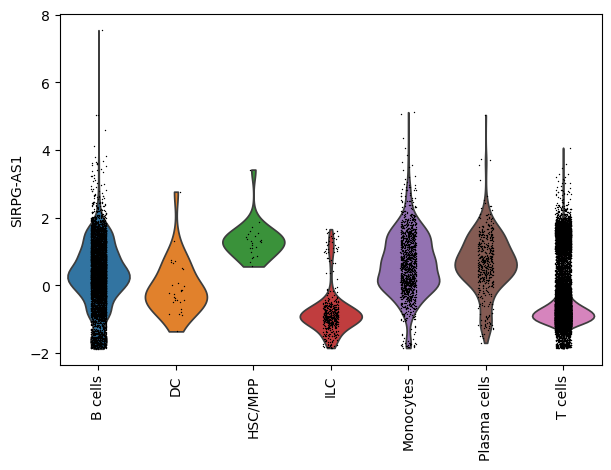

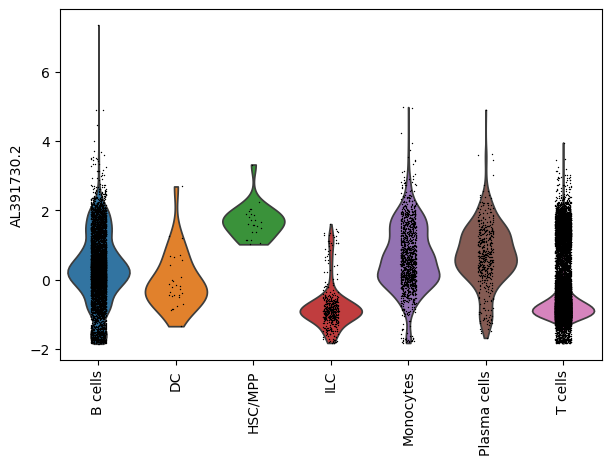

In [14]:
for gene in marker_genes:
    sc.pl.violin(adata, gene, groupby='cell_types_labels', rotation=90)

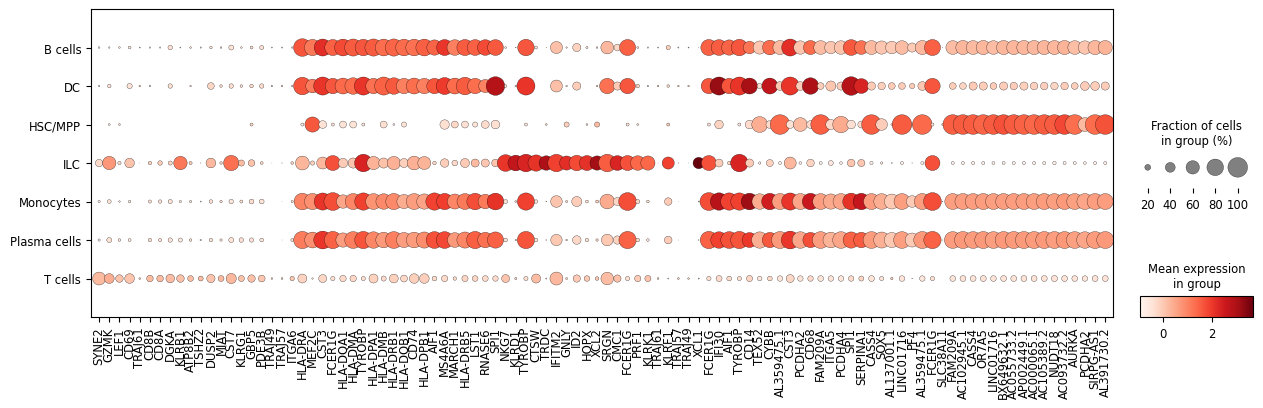

In [15]:
sc.pl.dotplot(adata, marker_genes, groupby='cell_types_labels', figsize=(15, 4), dendrogram=False);

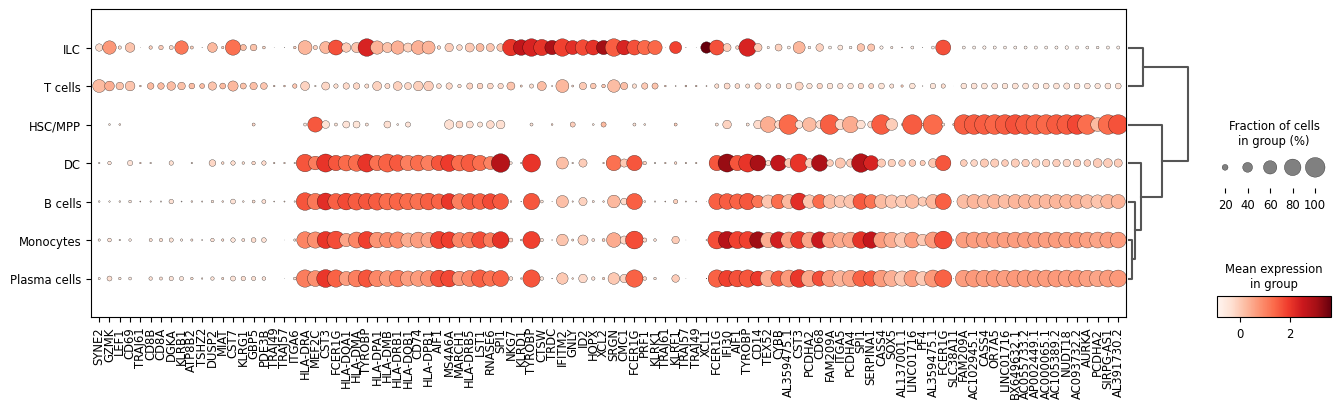

In [16]:
sc.pl.dotplot(adata, marker_genes, groupby='cell_types_labels', figsize=(16, 4), dendrogram=True);

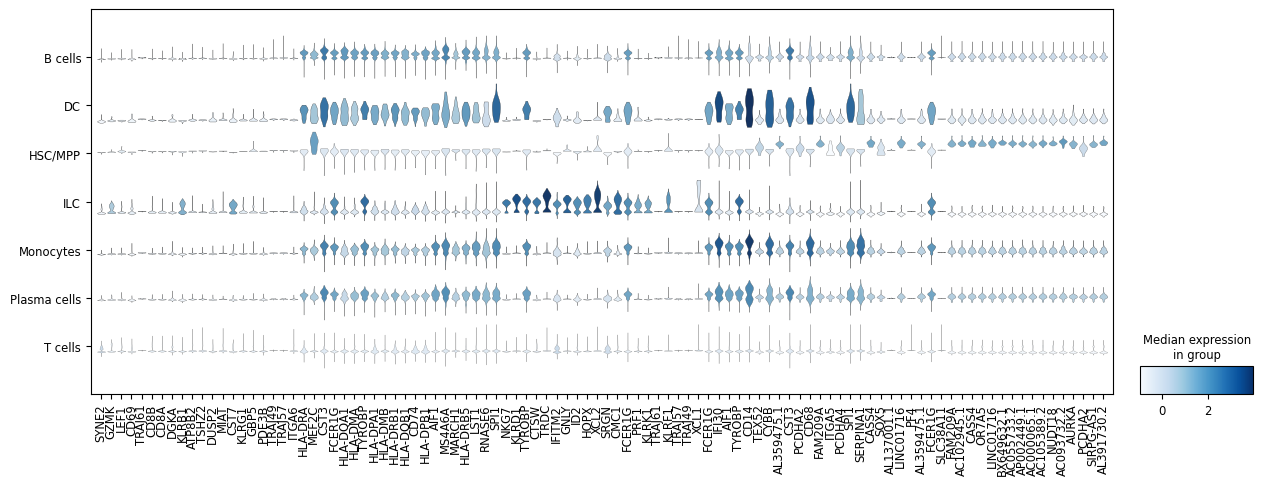

In [17]:
sc.pl.stacked_violin(adata, marker_genes, groupby='cell_types_labels', figsize=(15, 5), dendrogram=False);

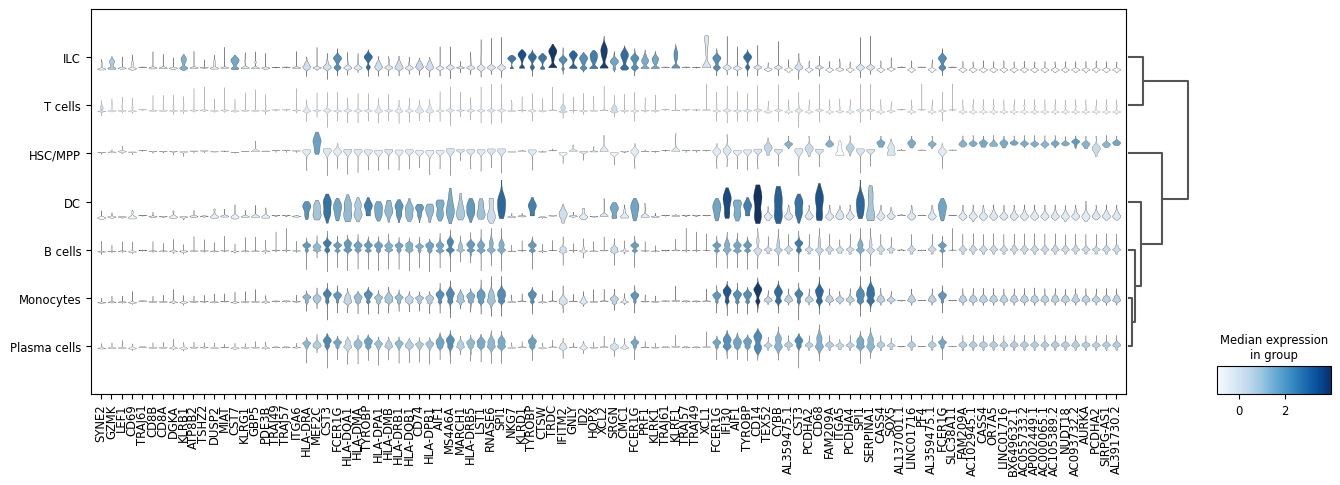

In [18]:
sc.pl.stacked_violin(adata, marker_genes, groupby='cell_types_labels', figsize=(16, 5), dendrogram=True);

In [19]:
adata_rest = adata[~adata.obs['cell_types_labels'].isin(most_freq_cell_types)]

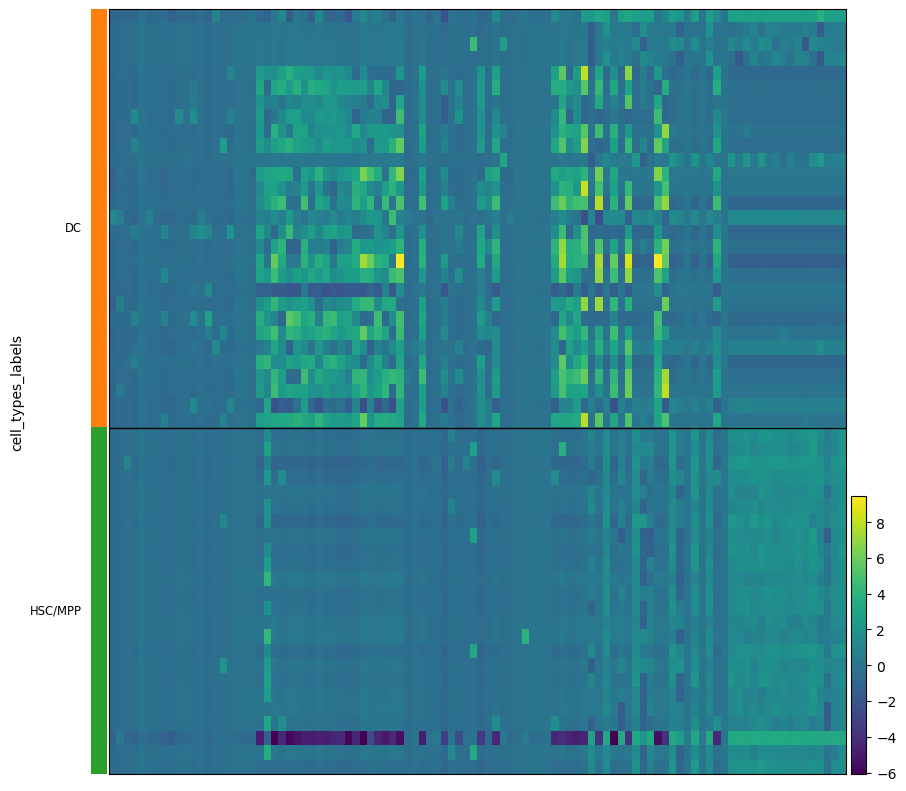

In [20]:
sc.pl.heatmap(adata_rest, marker_genes, groupby='cell_types_labels', dendrogram=False, figsize=(10, 10));

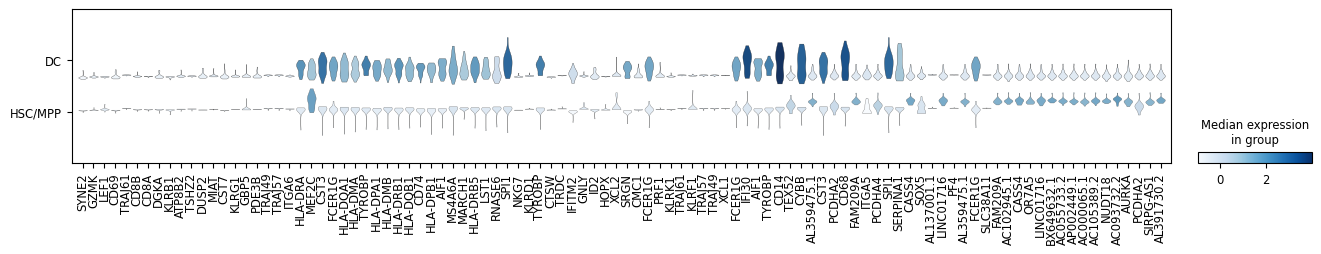

In [21]:
sc.pl.stacked_violin(adata_rest, marker_genes, groupby='cell_types_labels', figsize=(16, 2));

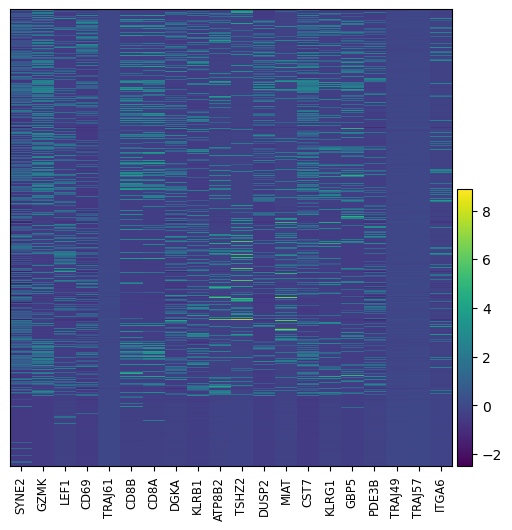

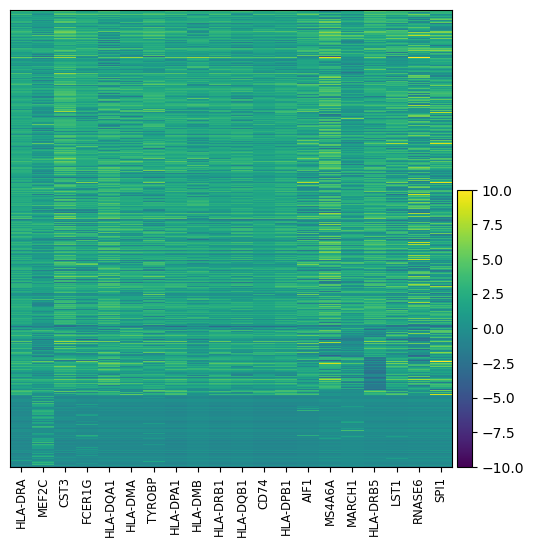

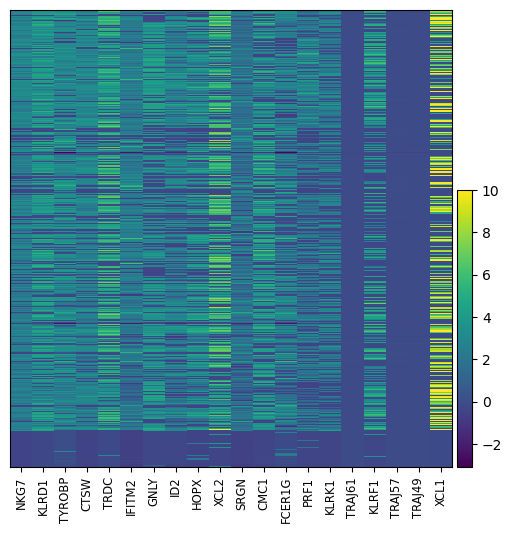

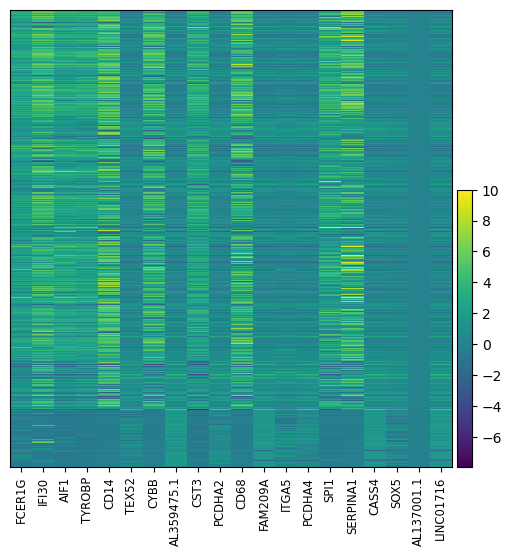

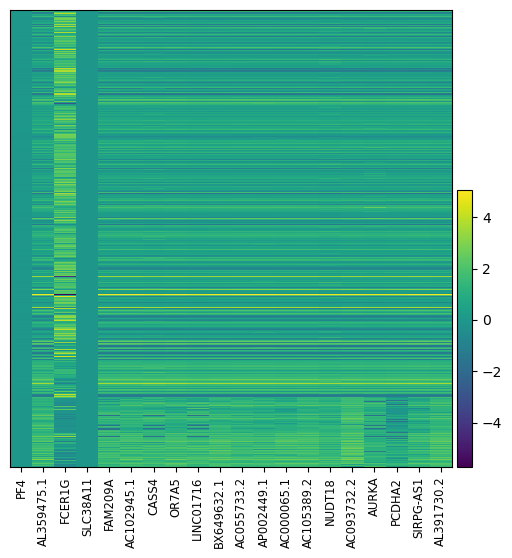

In [22]:
for cell_type in most_freq_cell_types:
    sc.pl.heatmap(adata[adata.obs['cell_types_labels'] == cell_type],
        cluster_genes[cell_type], groupby='cell_types_labels', dendrogram=False);